# Deep Learning Notebook of project Building-Perceptron

## Introduction (must be done in english)

## Imports

In [426]:
# run pipreqs --force in notebook for imports outside of

In [427]:
# !pip install dataframe_image


In [428]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration
import missingno as msno
# import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

# Feature Selection & Importance & VIF
import shap
shap.initjs()
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Preprocessing
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder



# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# metrics
from sklearn.metrics import accuracy_score, recall_score
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# saving dataframe as img
import dataframe_image as dfi


import plotly.graph_objects as go

### Custom Imports

In [429]:
from functions import compare_feature_lists
# from Perceptron import visualize_data

### Sns Styles

In [430]:

orange = "#FFA500"
purple = "#800080"
grey = "#808080"

custom_palette = ["#FFA500", "#FF8C00", "#FF5500", "#FF2200", "#800040", "#400080", "#800080", "#808080", "#808080"]

custom_palette_f5 = [
    purple   ,  # purple
    '#3B528B',  # Blue
    orange   ,  #orange
    '#21918C',  # Green
    # '#5DC863',  # Yellow-Green
    grey     ,  #grey
    # '#FDE725'   # Yellow
]

viridis_colors = [
    purple   ,  # Purple
    '#3B528B',  # Blue
    '#21918C',  # Green
    '#5DC863',  # Yellow-Green
    '#FDE725'   # Yellow
]

sns.set_palette(custom_palette)


### Importing Perceptron class

In [431]:
# from Perceptron import Perceptron_v1

### Importing constants

In [432]:
from constants import DATA_PATH

## Data Exploration

### Loading Data

In [433]:
df = pd.read_csv(DATA_PATH, sep=';')
# shuffling df to prepare for eventual data reduction from balancing target
# df = original_df.sample(frac=1).reset_index(drop=True)
df.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate


### Exploratory analysis

#### General checks

In [434]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [435]:
df.shape

(4424, 37)

In [436]:
df.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate


In [437]:
df.duplicated().sum()

0

In [438]:
df.dtypes.value_counts().index

Index([int64, float64, object], dtype='object')

In [439]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [440]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [441]:
percentage_missing = df.isnull().sum().sort_values(ascending = False)/df.shape[0]*100
print(f"{percentage_missing[percentage_missing<30].count()} beneficial features")
percentage_missing

37 beneficial features


Marital status                                    0.0
Age at enrollment                                 0.0
Curricular units 1st sem (credited)               0.0
Curricular units 1st sem (enrolled)               0.0
Curricular units 1st sem (evaluations)            0.0
Curricular units 1st sem (approved)               0.0
Curricular units 1st sem (grade)                  0.0
Curricular units 1st sem (without evaluations)    0.0
Curricular units 2nd sem (credited)               0.0
Curricular units 2nd sem (enrolled)               0.0
Curricular units 2nd sem (evaluations)            0.0
Curricular units 2nd sem (approved)               0.0
Curricular units 2nd sem (grade)                  0.0
Curricular units 2nd sem (without evaluations)    0.0
Unemployment rate                                 0.0
Inflation rate                                    0.0
GDP                                               0.0
International                                     0.0
Scholarship holder          

In [442]:
# Get the number of unique values for each column and sort in ascending order
sorted_unique_counts = df.nunique().sort_values(ascending=True)

# Display the result
print(sorted_unique_counts)

Scholarship holder                                  2
International                                       2
Gender                                              2
Tuition fees up to date                             2
Daytime/evening attendance\t                        2
Debtor                                              2
Educational special needs                           2
Displaced                                           2
Target                                              3
Marital status                                      6
Application order                                   8
Inflation rate                                      9
Unemployment rate                                  10
Curricular units 2nd sem (without evaluations)     10
GDP                                                10
Curricular units 1st sem (without evaluations)     11
Previous qualification                             17
Course                                             17
Application mode            

In [443]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [444]:
df[(df["Curricular units 1st sem (enrolled)"] > 0) & (df["Curricular units 2nd sem (enrolled)"] == 0)][["Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (enrolled)"]].head(2)

,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled)


In [445]:
df[(df["Curricular units 2nd sem (enrolled)"] == 0)][["Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (enrolled)"]].head(2)

,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled)
0,0,0
20,0,0


In [446]:
df[df["Curricular units 1st sem (enrolled)"] != df["Curricular units 2nd sem (enrolled)"]][["Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (enrolled)"]].shape[0]

778

In [447]:
#  'Curricular units 2nd sem (without evaluations)',
df['Unemployment rate'].mean()

11.56613924050633

In [448]:
df['Curricular units 2nd sem (without evaluations)'].value_counts()

Curricular units 2nd sem (without evaluations)
0     4142
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: count, dtype: int64

In [449]:
df[(df["Curricular units 1st sem (enrolled)"] > 0) & (df["Curricular units 2nd sem (enrolled)"] == 0)][["Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (enrolled)"]].head(2)

,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled)


#### Objects

In [450]:
df.select_dtypes(include=['object']).info() # object int64 float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  4424 non-null   object
dtypes: object(1)
memory usage: 34.7+ KB


#### Int64

In [451]:
df.select_dtypes(include=['int64']).info() # object int64 float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Marital status                                  4424 non-null   int64
 1   Application mode                                4424 non-null   int64
 2   Application order                               4424 non-null   int64
 3   Course                                          4424 non-null   int64
 4   Daytime/evening attendance	                     4424 non-null   int64
 5   Previous qualification                          4424 non-null   int64
 6   Nacionality                                     4424 non-null   int64
 7   Mother's qualification                          4424 non-null   int64
 8   Father's qualification                          4424 non-null   int64
 9   Mother's occupation                             4424 non-null  

#### Float64

In [452]:
df.select_dtypes(include=['float64']).info() # object int64 float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Previous qualification (grade)    4424 non-null   float64
 1   Admission grade                   4424 non-null   float64
 2   Curricular units 1st sem (grade)  4424 non-null   float64
 3   Curricular units 2nd sem (grade)  4424 non-null   float64
 4   Unemployment rate                 4424 non-null   float64
 5   Inflation rate                    4424 non-null   float64
 6   GDP                               4424 non-null   float64
dtypes: float64(7)
memory usage: 242.1 KB


#### Others

In [453]:
df.select_dtypes(exclude=['float64', "int64", "object"]).info() # object int64 float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Empty DataFrame


#### Target & flow

In [454]:
# plt.figure(figsize=(6, 4),)
# sns.countplot(x='Target', hue = df.Target, data=df, palette="Paired")
# plt.title('Distribution of Target')
# plt.show()

Glyph 9 (	) missing from current font.


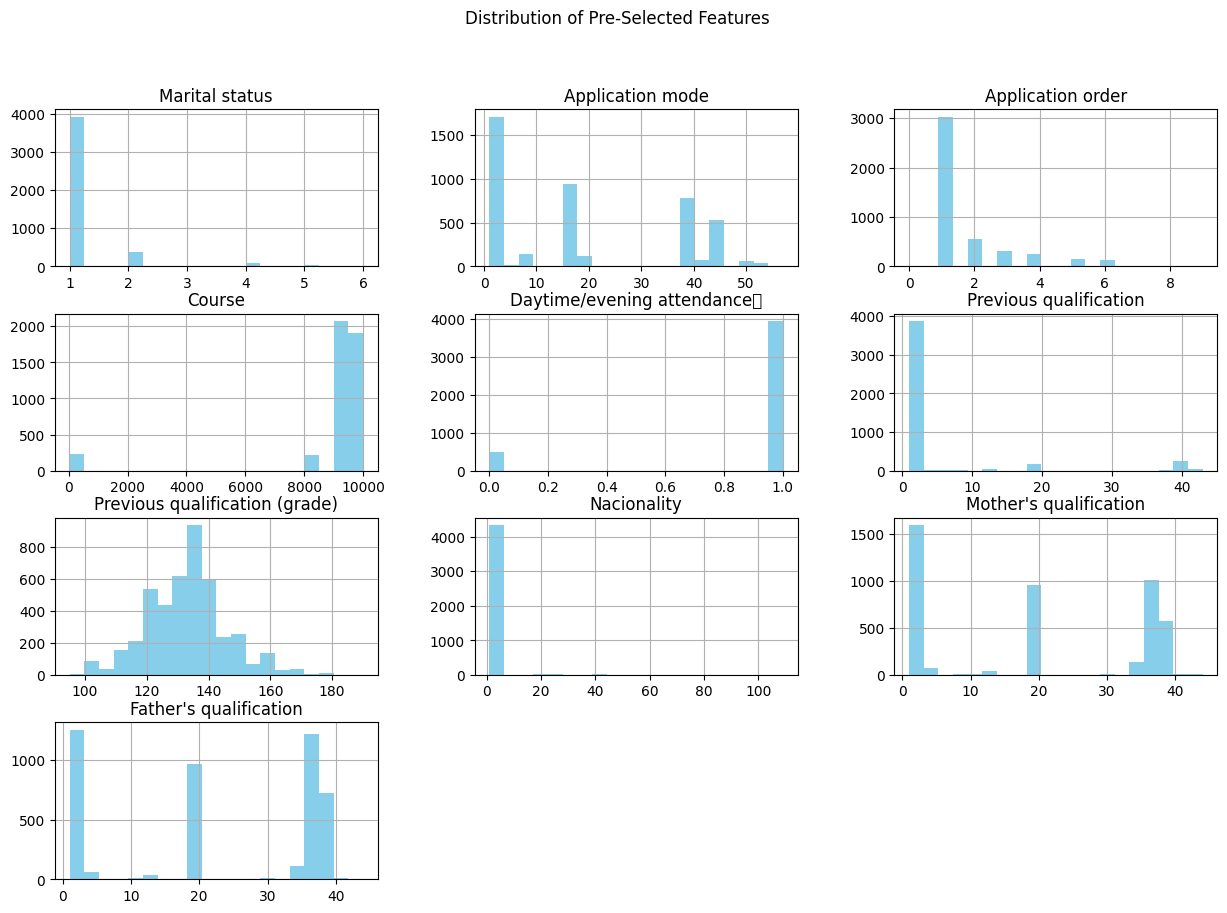

In [455]:
# Plot histograms of the first few features
df.iloc[:, :10].hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution of Pre-Selected Features")
plt.show()


In [456]:
# print(df.columns)

# # Filter out rows where either 'Curricular units 1st sem (grade)' or 'Curricular units 2nd sem (grade)' is equal to 0
# df = df[(df['Curricular units 1st sem (grade)'] != 0) & (df['Curricular units 2nd sem (grade)'] != 0)]

# # Calculate the yearly average grade
# df["Target"] = df[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean(axis=1)

# df.drop(columns=['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'], inplace=True)

# # Print the mean of the yearly average grade
# print(df["Target"].mean())

In [457]:
df.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [458]:
df.Target.value_counts(normalize=True)

Target
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64

In [459]:
# mean_features = [col for col in df.columns if 'mean' in col]
# print(mean_features)
# plt.figure(figsize=(20, 15))
# for i, feature in enumerate(mean_features):
#     plt.subplot(3, 4, i+1)
#     sns.boxplot(hue='Target', y=feature, data=df, palette='Paired')
#     plt.title(f'{feature} vs Target')
# plt.tight_layout()
# plt.show()

In [460]:
# # Distribution des autres colonnes ( autres que ceux contenant mean)
# other_features = [col for col in df.columns if 'mean' not in col and col != "Target"]


# num_features = len(other_features)
# num_cols = 4
# num_rows = (num_features + num_cols - 1) // num_cols

# plt.figure(figsize=(20, 4 * num_rows))

# # Boxplot de xhaque variable
# for i, feature in enumerate(other_features):
#     plt.subplot(num_rows, num_cols, i+1)
#     sns.boxplot(hue='Target', y=feature, data=df, palette='Paired')
#     plt.title(f'{feature} vs Target')

# plt.tight_layout()
# plt.show()


In [461]:
numeric_df = pd.get_dummies(df, drop_first=True)
numeric_df["Target_Dropout"] = np.where((numeric_df["Target_Enrolled"] == False) & (numeric_df["Target_Graduate"] == False), 1, 0)
numeric_df["Target_Graduate"] = np.where(numeric_df["Target_Graduate"] == True, 1, 0)
numeric_df["Target_Enrolled"] = np.where(numeric_df["Target_Enrolled"] == True, 1, 0)

Glyph 9 (	) missing from current font.
Glyph 9 (	) missing from current font.


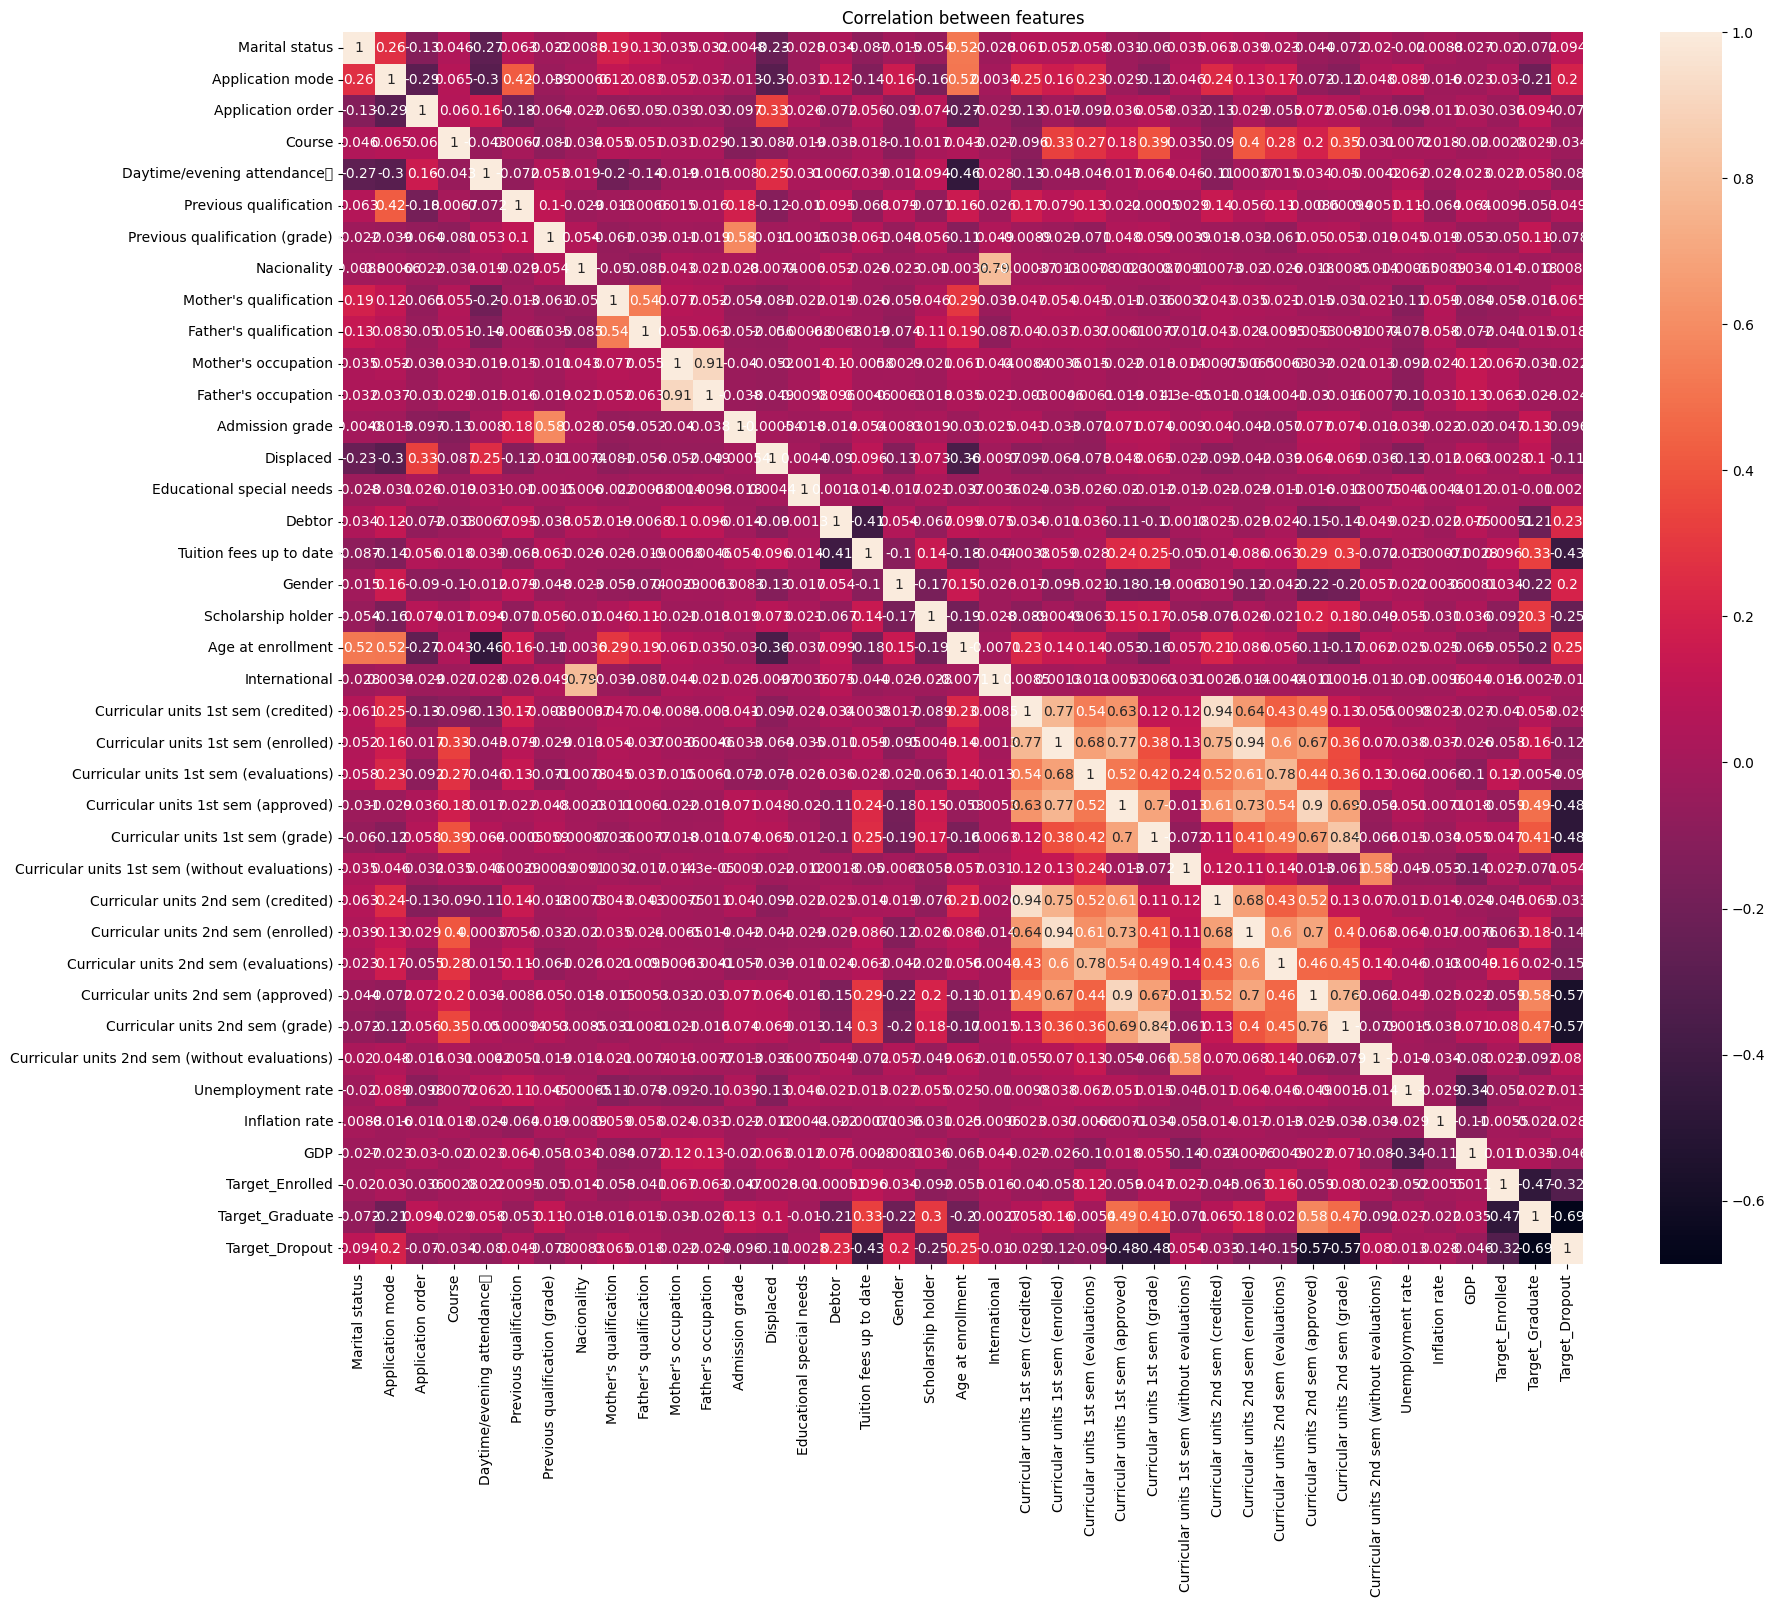

In [462]:
X = df.drop("Target", axis=1)
y = df["Target"]
y = y.apply(lambda x: 0 if x == "Dropout" else 2 if x == "Graduated" else 1)

# Convert categorical columns to numeric using Label Encoding or One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Select only the numeric columns
# numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
plt.figure(figsize=(20, 16))
corr_matrix = sns.heatmap(numeric_df.corr(), annot=True) # , cmap='Paired'
plt.title('Correlation between features')
plt.show()


In [463]:
# numeric_df[numeric_df.str.startswith('Target')]

In [464]:


# X_encoded["Target_Dropout"] = np.where((X_encoded["Target_Enrolled"] == False) & (X_encoded["Target_Graduate"] == False), 1, 0)
# X_encoded["Target_Graduate"] = np.where(X_encoded["Target_Graduate"] == True, 1, 0)
# X_encoded["Target_Enrolled"] = np.where(X_encoded["Target_Enrolled"] == True, 1, 0)
numeric_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Enrolled,Target_Graduate,Target_Dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.000000,0,10.8,1.4,1.74,0,0,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,13.666667,0,13.9,-0.3,0.79,0,1,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0.000000,0,10.8,1.4,1.74,0,0,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,10,5,12.400000,0,9.4,-0.8,-3.12,0,1,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,13.000000,0,13.9,-0.3,0.79,0,1,0


In [465]:
# X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [466]:
X_encoded.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [467]:
df["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [468]:
df["Target"] = df["Target"].apply(lambda x: 0 if x == "Dropout" else 1 if x == "Graduate" else 2)
print(df["Target"].value_counts())
df = df[df["Target"] != 2]
print(df["Target"].value_counts())
print(df["Target"].value_counts(normalize=True))

Target
1    2209
0    1421
2     794
Name: count, dtype: int64
Target
1    2209
0    1421
Name: count, dtype: int64
Target
1    0.60854
0    0.39146
Name: proportion, dtype: float64


## Cleaning Data

In [469]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

### Analyse Univarié

#### Marital status

In [470]:
df["Marital status"].value_counts()

Marital status
1    3199
2     327
4      75
5      22
6       5
3       2
Name: count, dtype: int64

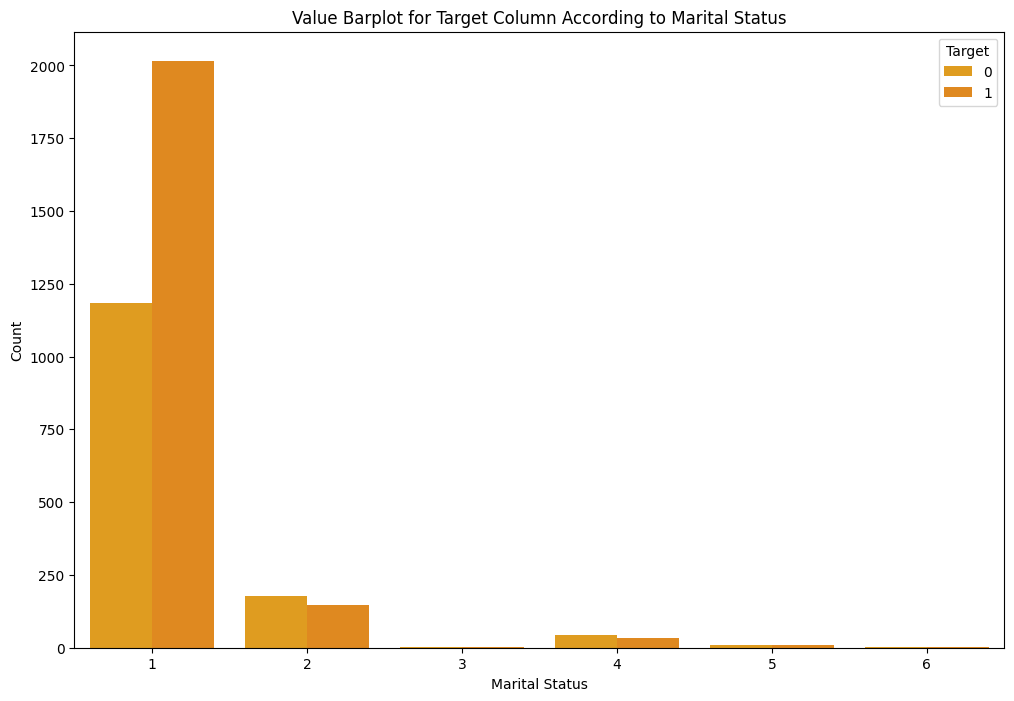

In [471]:
# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby(['Marital status', 'Target']).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Marital status', y='count', hue='Target', data=df_grouped)
plt.title('Value Barplot for Target Column According to Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()

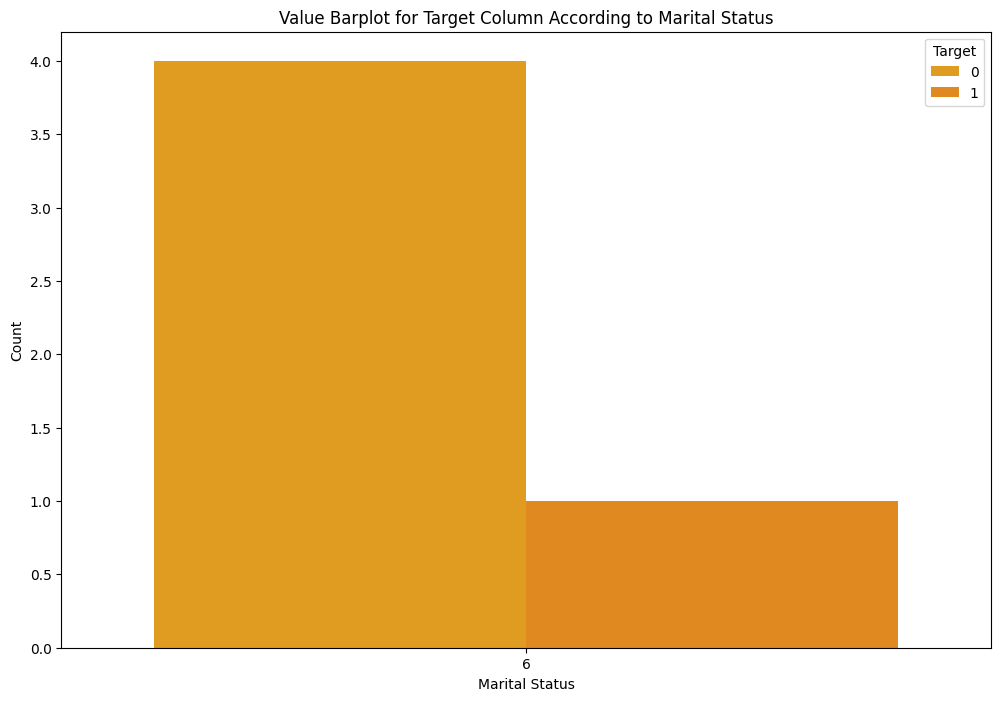

In [472]:
# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Marital status', y='count', hue='Target', data=df_grouped[df_grouped["Marital status"] == 6])
plt.title('Value Barplot for Target Column According to Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()

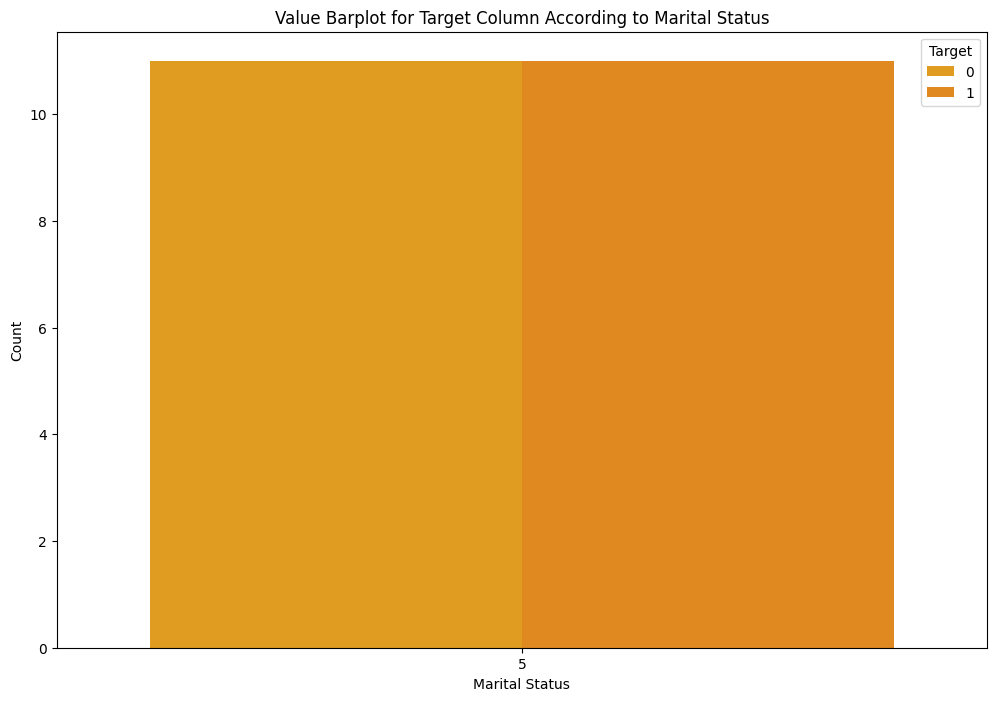

In [473]:
# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Marital status', y='count', hue='Target', data=df_grouped[df_grouped["Marital status"] == 5])
plt.title('Value Barplot for Target Column According to Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()

#### Application mode

In [474]:
df["Application mode"].value_counts()

Application mode
1     1408
17     713
39     664
43     237
44     157
7      132
18     108
42      66
51      46
16      30
53      25
15      20
10      10
5        8
2        3
57       1
26       1
27       1
Name: count, dtype: int64

Application mode
1     1408
17     713
39     664
43     237
44     157
7      132
18     108
42      66
51      46
16      30
53      25
15      20
10      10
5        8
2        3
57       1
26       1
27       1
Name: count, dtype: int64


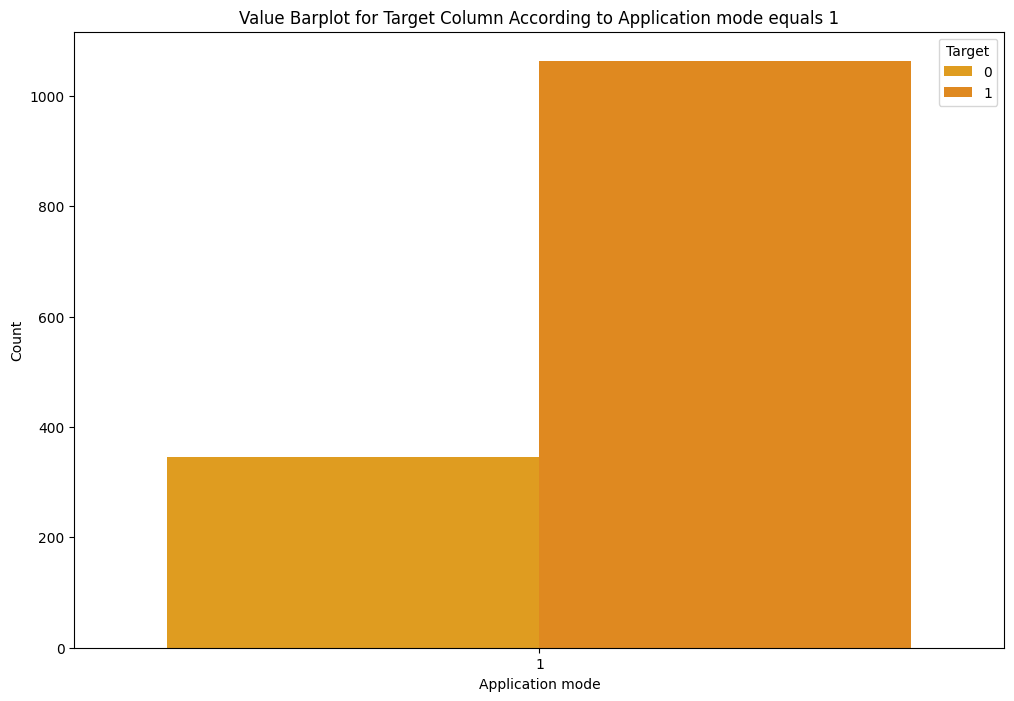

In [475]:
col_name = "Application mode"
target = "Target"
value_to_check_for = 1

print(df[col_name].value_counts())

# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped[df_grouped[col_name] == value_to_check_for])
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

#### Application order

Application order
1    2461
2     451
3     249
4     218
5     129
6     121
0       1
Name: count, dtype: int64


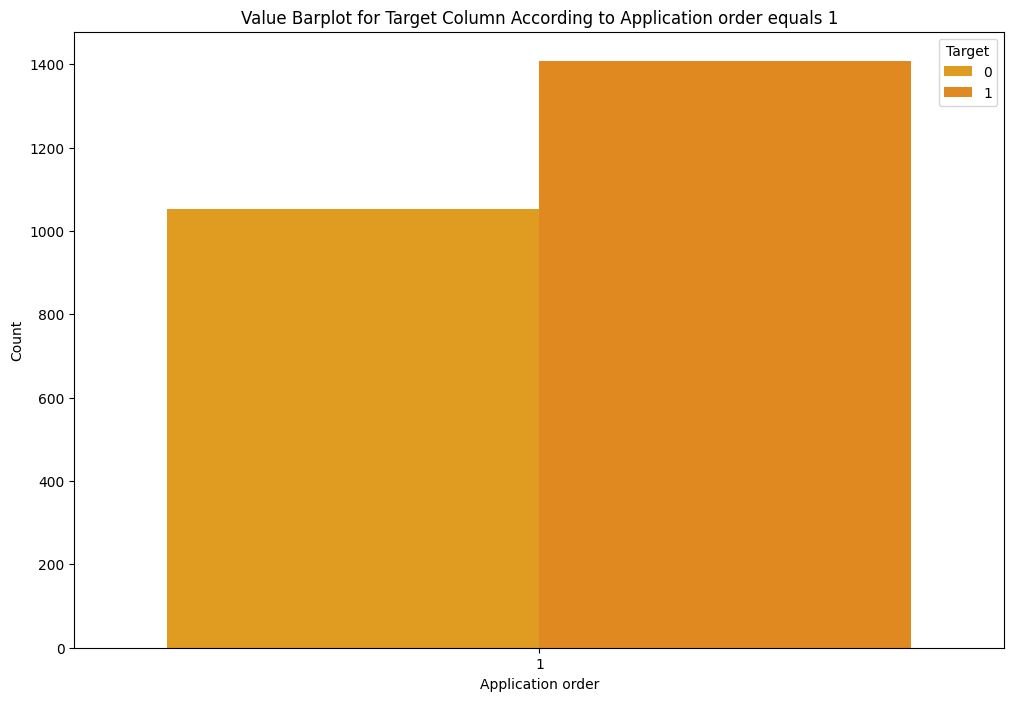

In [476]:
col_name = "Application order"
target = "Target"
value_to_check_for = 1

print(df[col_name].value_counts())

# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped[df_grouped[col_name] == value_to_check_for])
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

Application order
1    2461
2     451
3     249
4     218
5     129
6     121
0       1
Name: count, dtype: int64


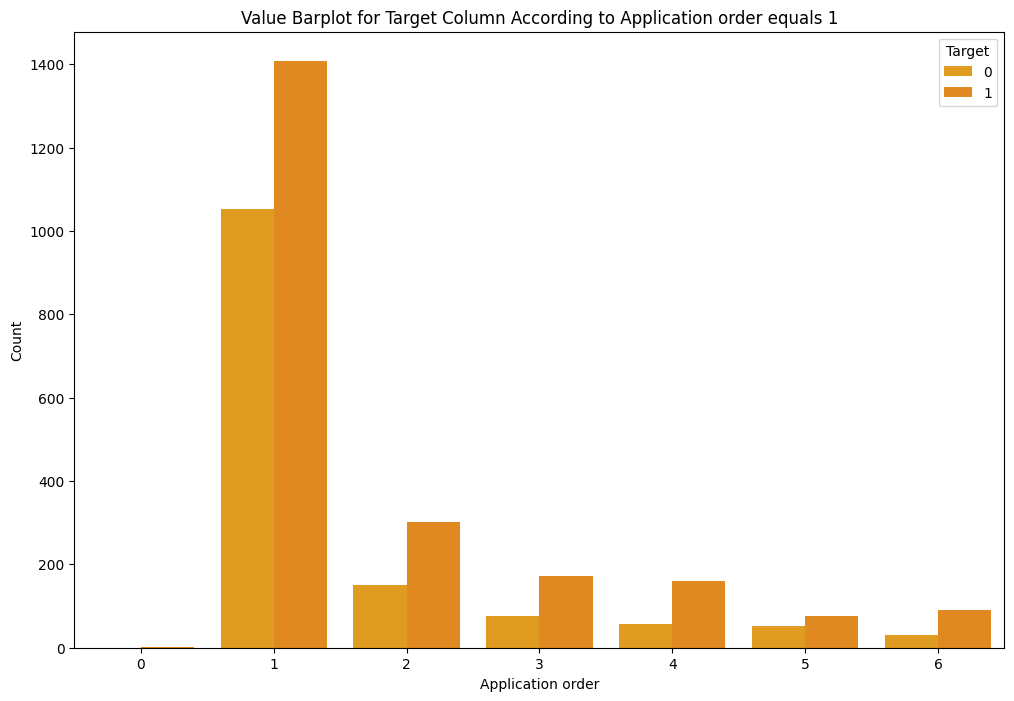

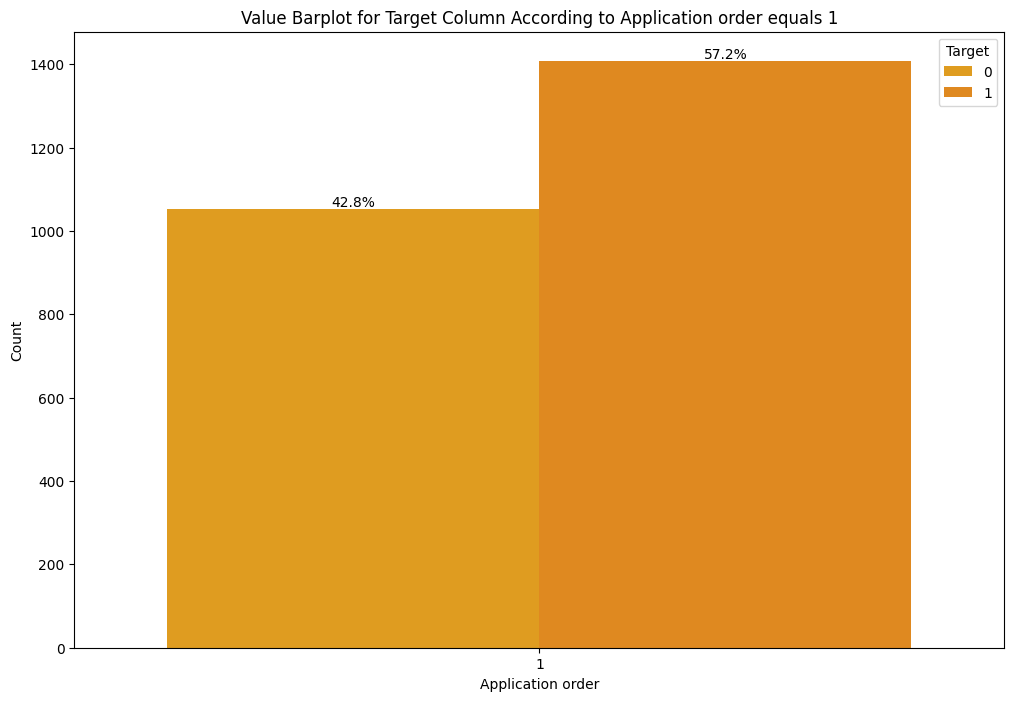

In [477]:
col_name = "Application order"
target = "Target"
value_to_check_for = 1

print(df[col_name].value_counts())

# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Filter the data for the specific value of `col_name`
filtered_data = df_grouped[df_grouped[col_name] == value_to_check_for]

# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


#### Course

In [478]:
df["Course"].value_counts()

Course
9500    666
9238    313
9773    297
9147    272
9085    262
9670    220
9991    214
9254    211
8014    194
9070    184
171     178
9003    173
9853    142
9130    120
9119    106
9556     69
33        9
Name: count, dtype: int64

Course
9500    666
9238    313
9773    297
9147    272
9085    262
9670    220
9991    214
9254    211
8014    194
9070    184
171     178
9003    173
9853    142
9130    120
9119    106
9556     69
33        9
Name: count, dtype: int64


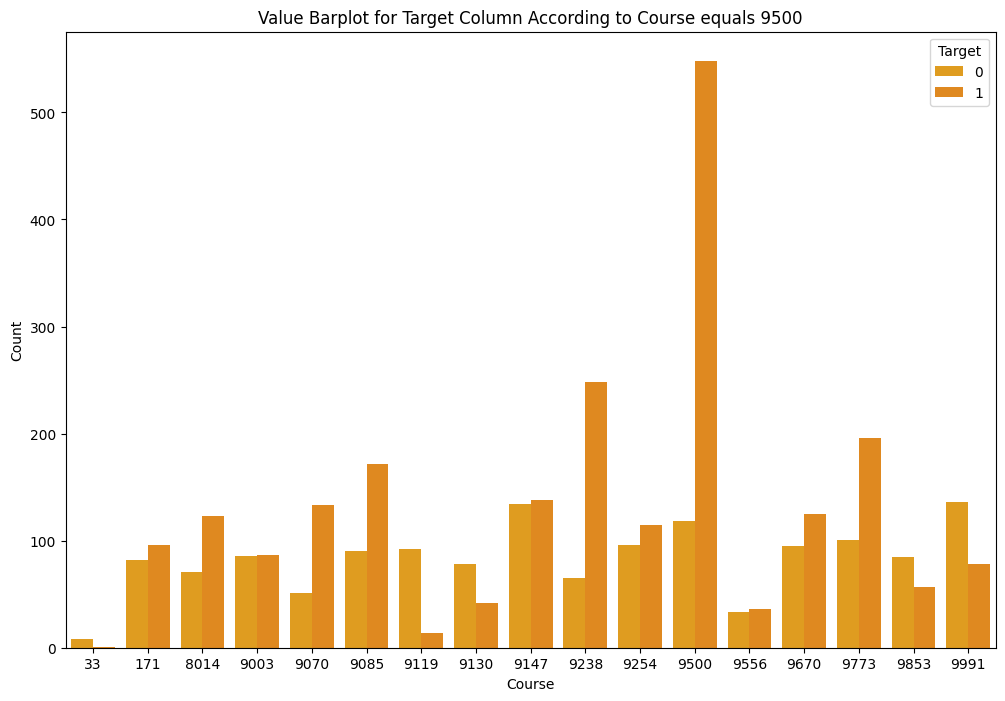

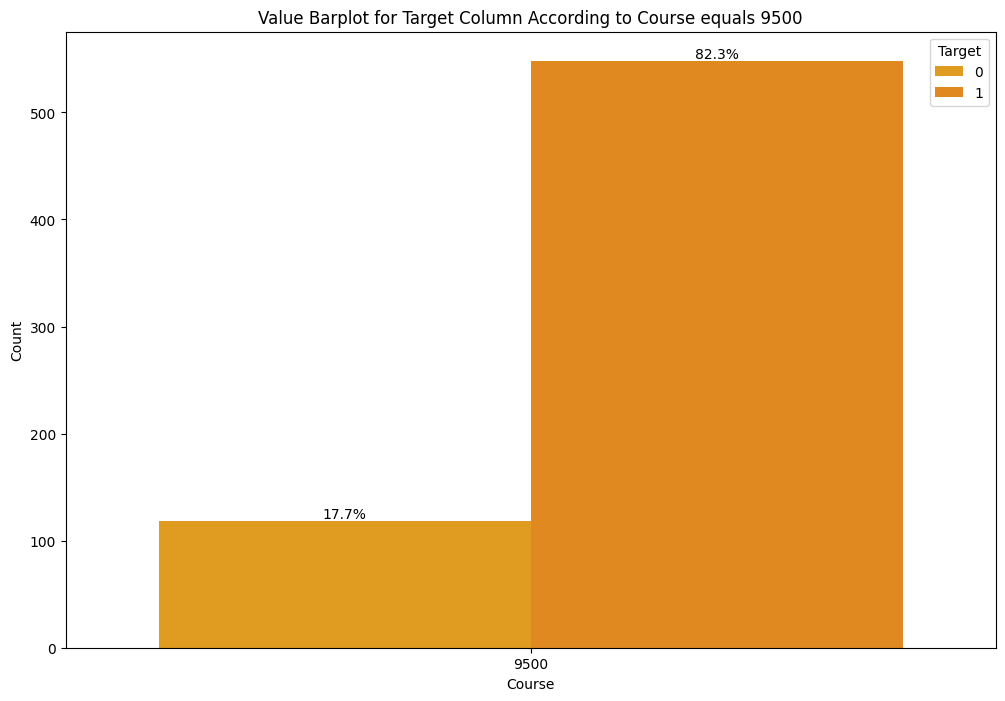

In [479]:
col_name = "Course"
target = "Target"
value_to_check_for = 9500

print(df[col_name].value_counts())

# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Filter the data for the specific value of `col_name`
filtered_data = df_grouped[df_grouped[col_name] == value_to_check_for]

# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


#### Daytime/evening attendance\t

In [487]:
df["Daytime/evening attendance\t"].value_counts()

Daytime/evening attendance\t
1    3213
0     408
Name: count, dtype: int64

Daytime/evening attendance\t
1    3213
0     408
Name: count, dtype: int64


Glyph 9 (	) missing from current font.


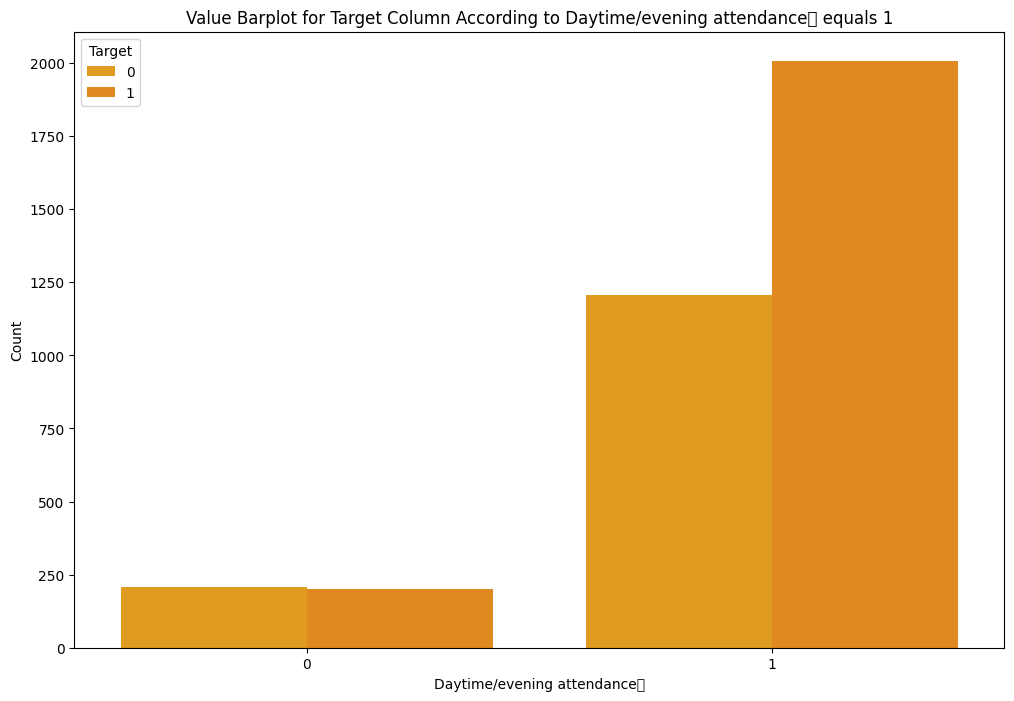

Glyph 9 (	) missing from current font.


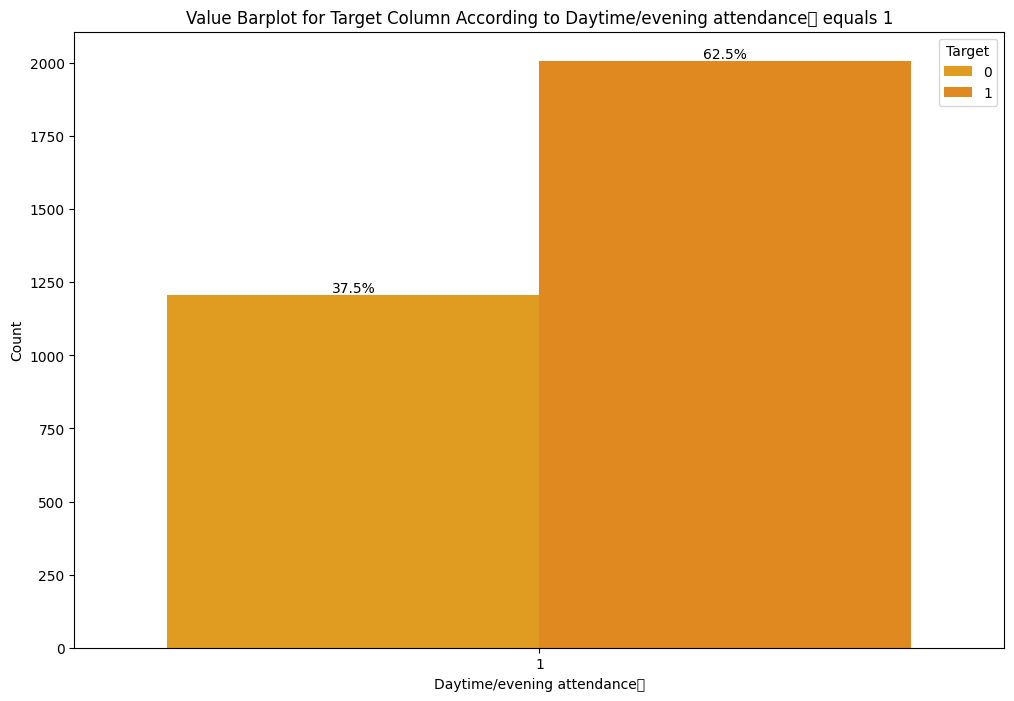

In [488]:
col_name = "Daytime/evening attendance\t"
target = "Target"
value_to_check_for = 1

print(df[col_name].value_counts())

# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Filter the data for the specific value of `col_name`
filtered_data = df_grouped[df_grouped[col_name] == value_to_check_for]

# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


In [489]:
df = df[df["Course"] != 33]

#### Previous qualification

In [491]:
col_name = "Previous qualification"
target = "Target"
value_to_check_for = 1

df[col_name].value_counts()

Previous qualification
1     3012
39     164
19     148
3      122
12      39
40      33
42      28
2       22
6       15
9       11
4        7
43       6
38       6
10       4
15       2
5        1
14       1
Name: count, dtype: int64

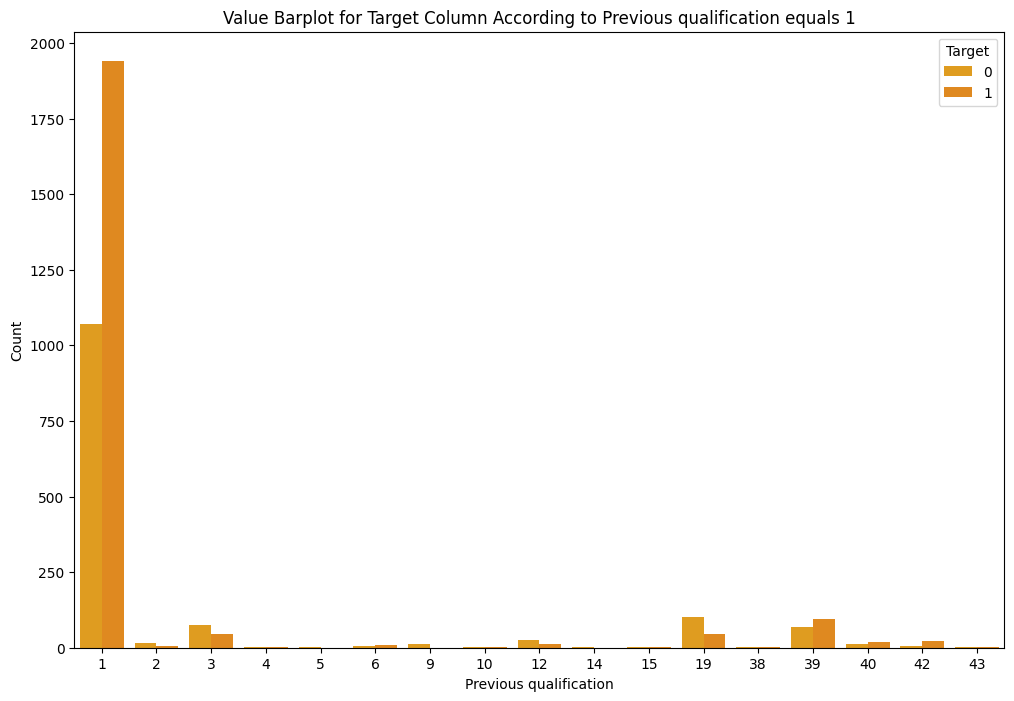

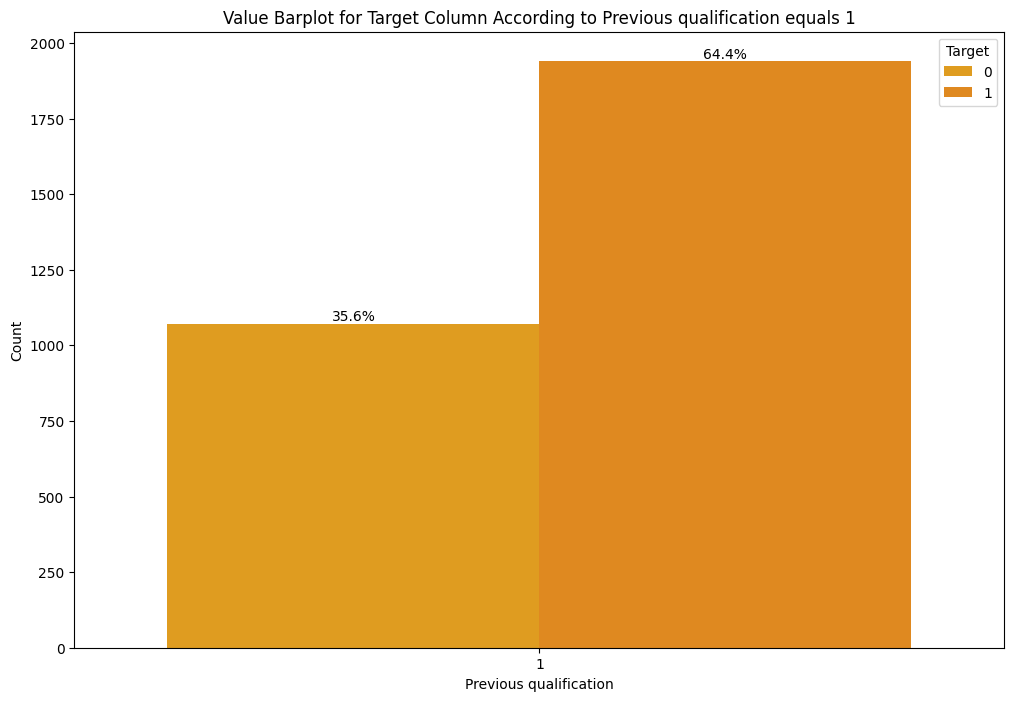

In [492]:
# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Filter the data for the specific value of `col_name`
filtered_data = df_grouped[df_grouped[col_name] == value_to_check_for]

# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


#### Previous qualification (grade)

In [493]:
col_name = "Previous qualification (grade)"
target = "Target"
value_to_check_for = 1

df[col_name].value_counts()

Previous qualification (grade)
133.1    424
130.0    300
140.0    271
120.0    223
150.0    137
        ... 
117.4      1
190.0      1
188.0      1
166.0      1
126.6      1
Name: count, Length: 101, dtype: int64

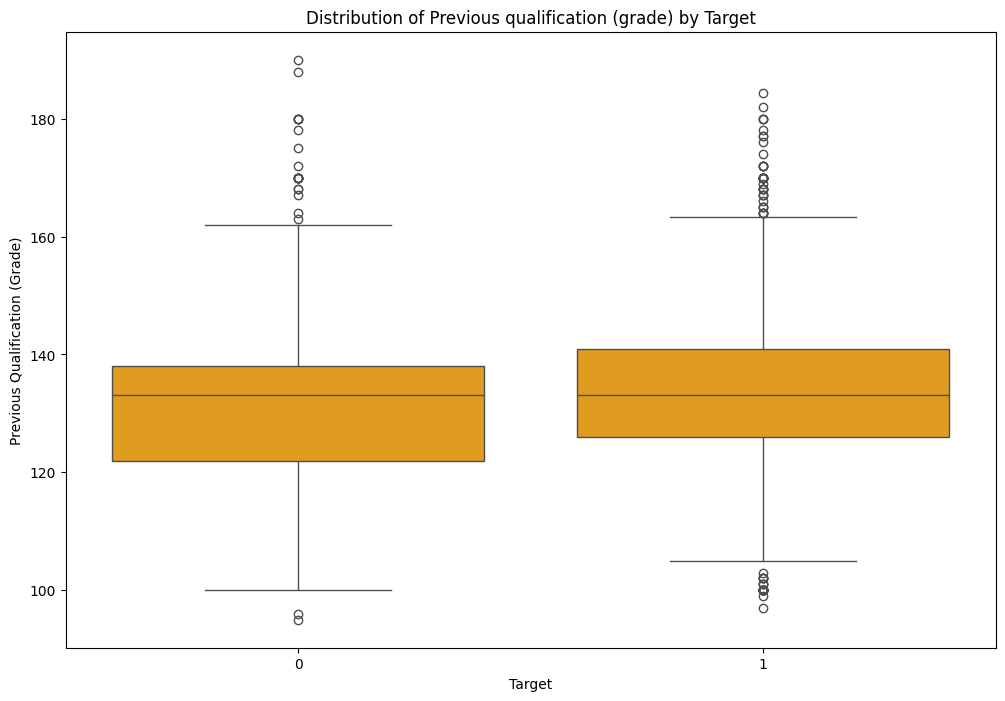

In [498]:
# Group by 'Previous qualification (grade)' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x=target, y=col_name, data=df)
plt.title(f'Distribution of {col_name} by {target}')
plt.xlabel('Target')
plt.ylabel('Previous Qualification (Grade)')
plt.show()


On observe un écart type assez élevé chez less élèves ayant Dropout(0). La médianne des 2 classes est très prochee et les 2 classes présentent des outliers, bien que relativement peu nombreux et qu'ils ne pénalisent qu'assez peu la distribution.
L'IQR des élèves ayant graduate (1) est assez nettement plus faible, ce qui est une bonne chose et montre bien que les élèves qui réussissent ont comme on peut s'y attendre de bonne notes avant leur intégration au programme. Pour autant ce facteur présenté par ce graphique montre que les notes précédentes sont loin d'être suffisantes pour prédire la réussite scolaire future des élèves.

#### Nacionality

In [506]:
col_name = "Nacionality"
target = "Target"
value_to_check_for = 1

df[col_name].value_counts()

Nacionality
1      3536
41       31
22       12
26        9
6         8
24        5
11        3
103       3
101       2
100       2
2         2
25        1
62        1
13        1
109       1
21        1
14        1
17        1
105       1
Name: count, dtype: int64

Si la feature s'avère être pertinente, il faudra absolument se débarasser des valeurs manquantes

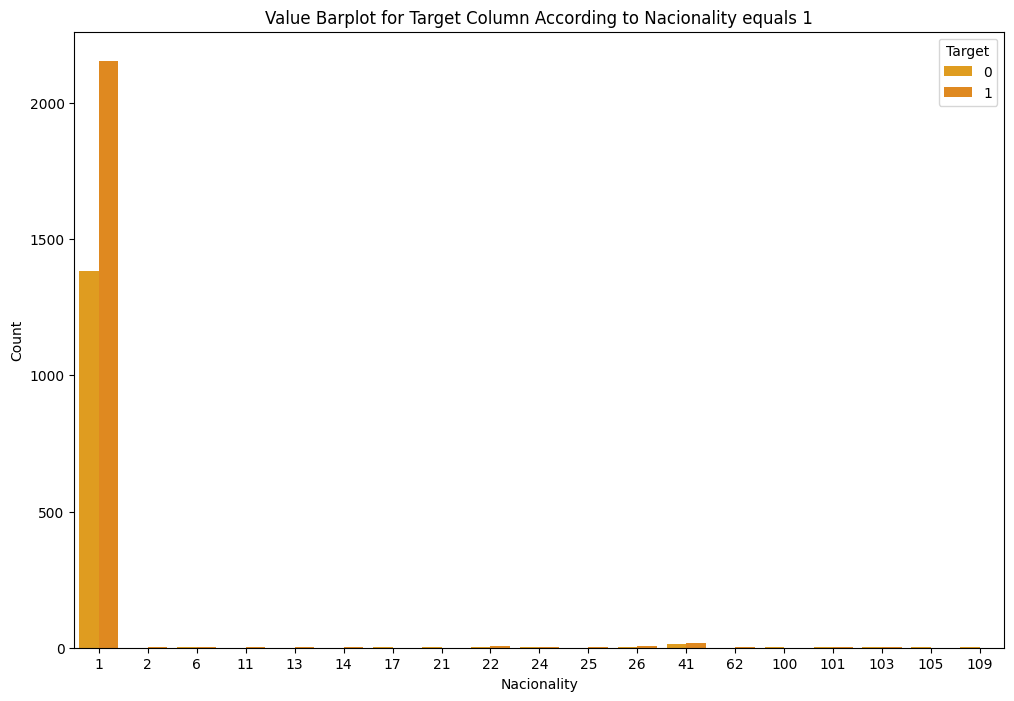

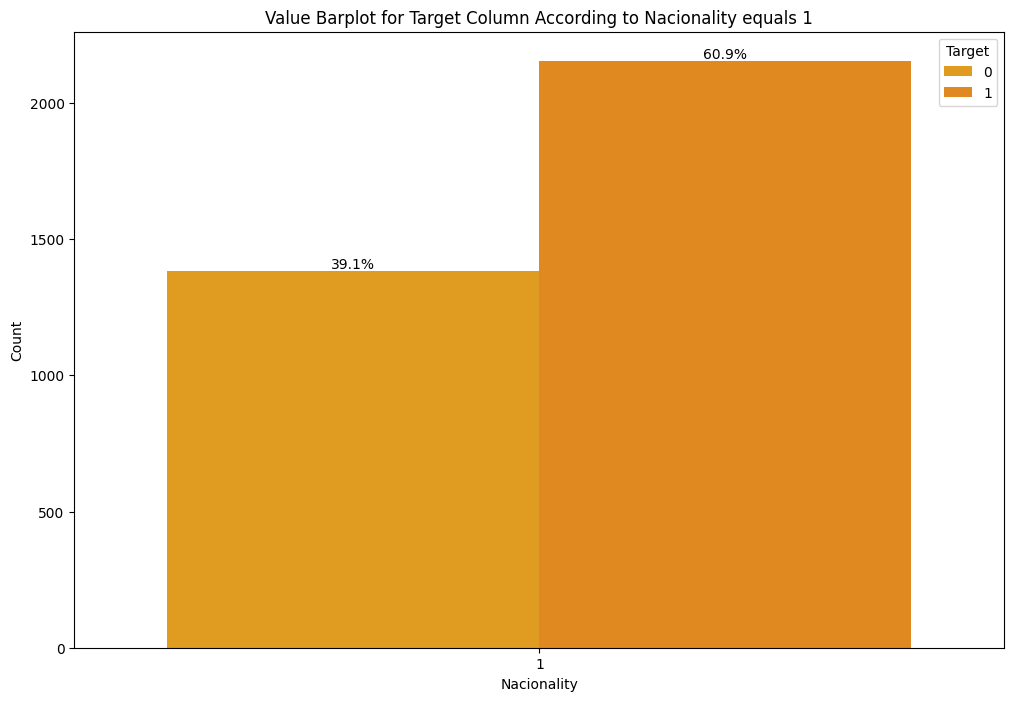

In [507]:
# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Filter the data for the specific value of `col_name`
filtered_data = df_grouped[df_grouped[col_name] == value_to_check_for]

# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

Donc on remarque bien que la population est Portuguaise, avec un certain nombre d'étudiants du Cap vert et brésilien, a voir si on crée une classe Portugais / Reste des Nationalités ou Portuguais + brésilien + cap vert / le reste.

#### Mother's qualification

In [508]:
col_name = "Mother's qualification"
target = "Target"
value_to_check_for = 1

df[col_name].value_counts()

Mother's qualification
1     865
37    839
19    774
38    466
3     337
34    127
2      60
12     39
4      34
5      16
40      8
9       8
39      6
41      6
6       4
42      4
43      3
29      3
10      3
11      3
36      3
35      3
30      3
14      2
18      1
22      1
27      1
26      1
44      1
Name: count, dtype: int64

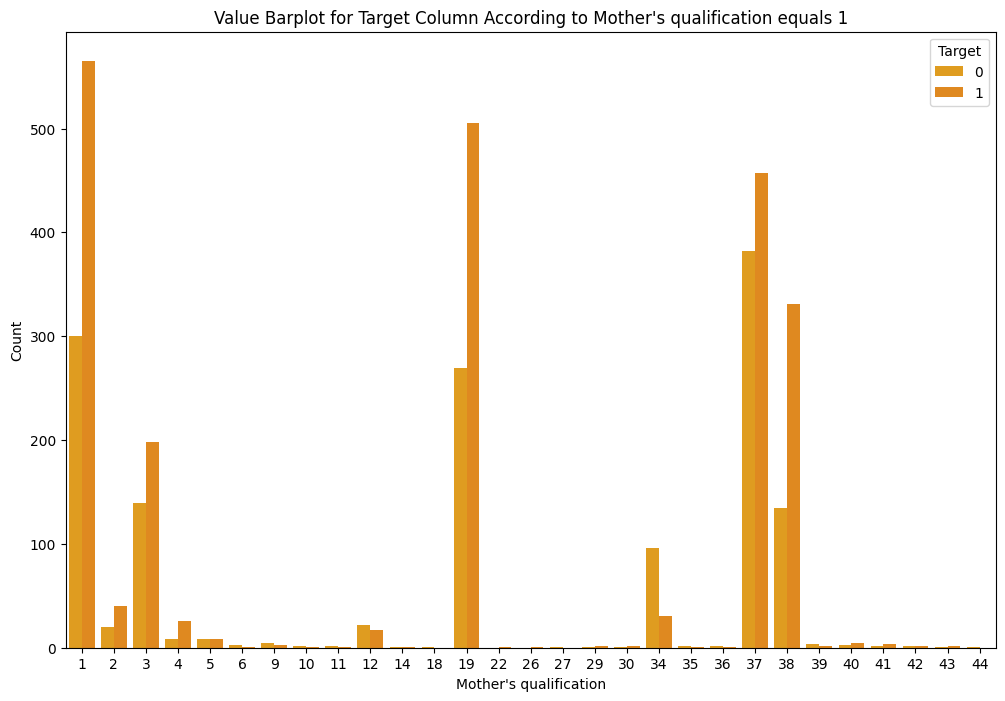

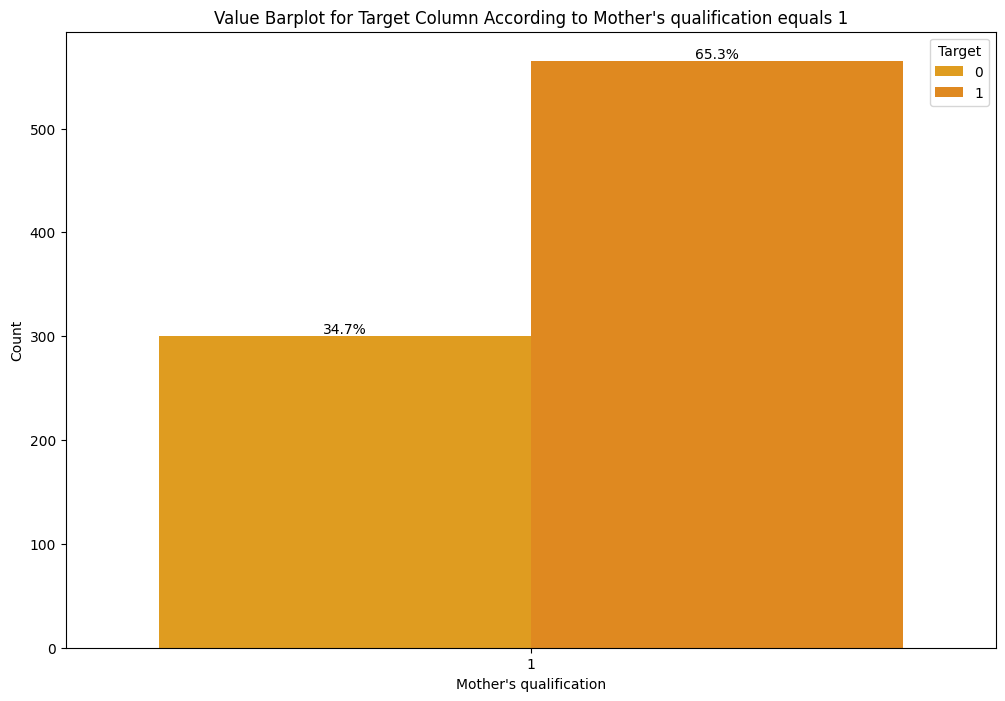

In [509]:
# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Filter the data for the specific value of `col_name`
filtered_data = df_grouped[df_grouped[col_name] == value_to_check_for]

# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


#### Mother's occupation

In [518]:
col_name = "Mother's occupation"
target = "Target"
value_to_check_for = 90

df[col_name].value_counts()

Mother's occupation
9      1308
4       669
5       434
3       272
2       240
7       224
0       143
1        86
6        77
90       70
8        29
99       15
191      15
123       5
141       4
194       4
193       4
144       4
175       3
192       2
10        2
151       2
134       2
153       2
125       1
132       1
143       1
171       1
152       1
Name: count, dtype: int64

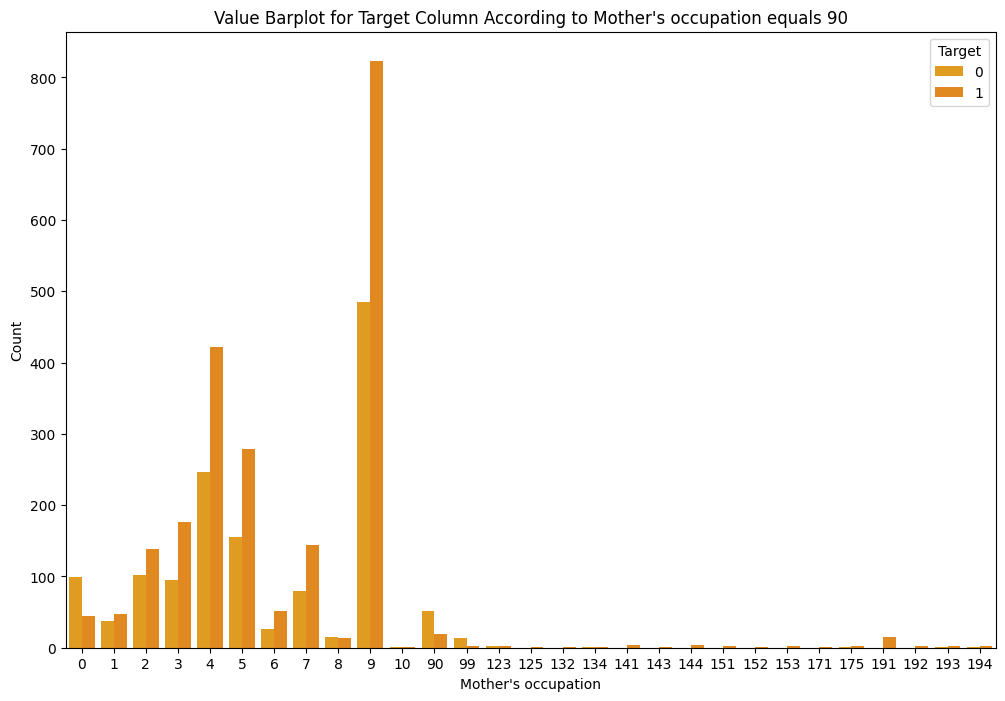

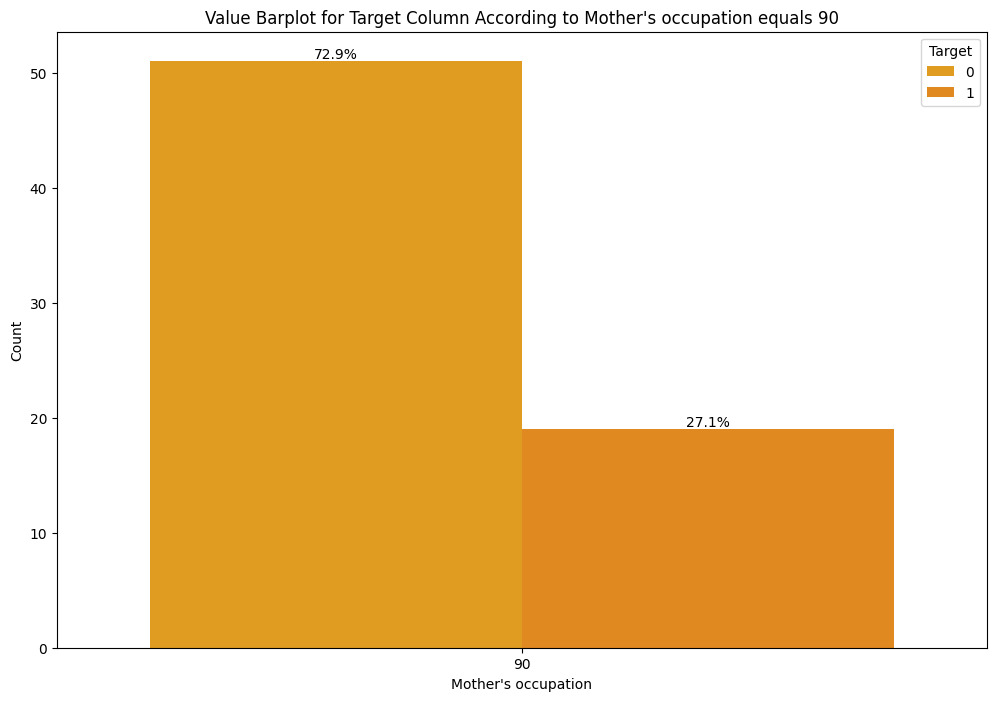

In [519]:
# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Filter the data for the specific value of `col_name`
filtered_data = df_grouped[df_grouped[col_name] == value_to_check_for]

# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


#### Father's occupation

In [522]:
col_name = "Father's occupation"
target = "Target"
value_to_check_for = 0

df[col_name].value_counts()

Father's occupation
9      845
7      554
5      408
3      321
4      311
8      262
10     212
6      192
2      147
0      125
1      110
90      65
99      17
193      7
144      5
192      4
103      3
171      3
194      2
175      2
151      2
135      2
181      2
163      2
174      1
112      1
122      1
101      1
141      1
114      1
154      1
153      1
131      1
183      1
102      1
152      1
172      1
143      1
182      1
195      1
124      1
123      1
Name: count, dtype: int64

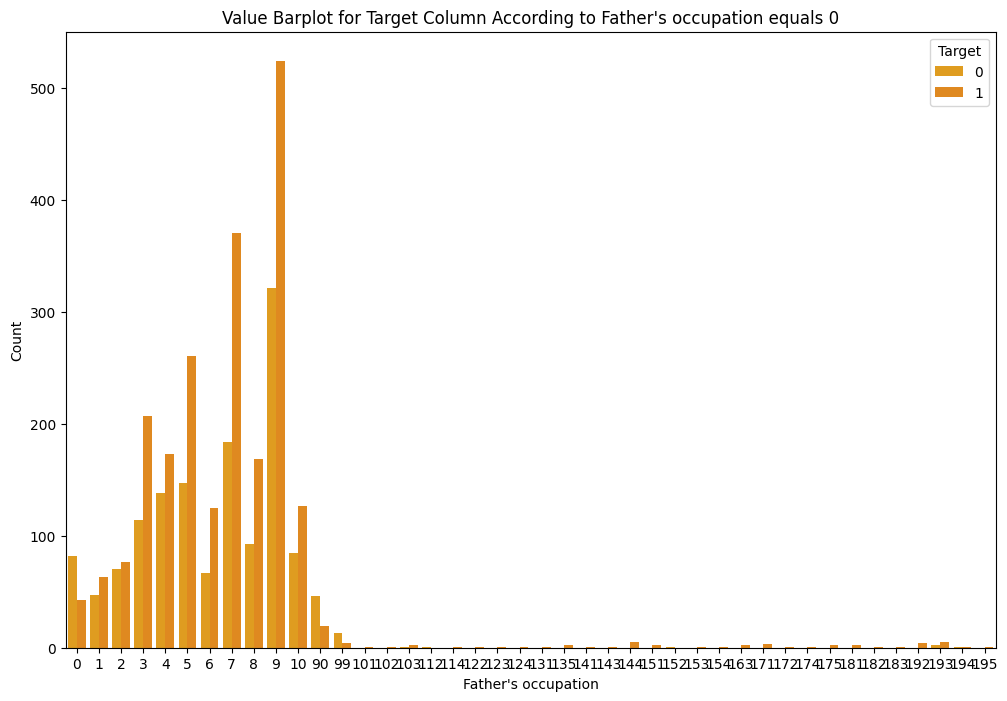

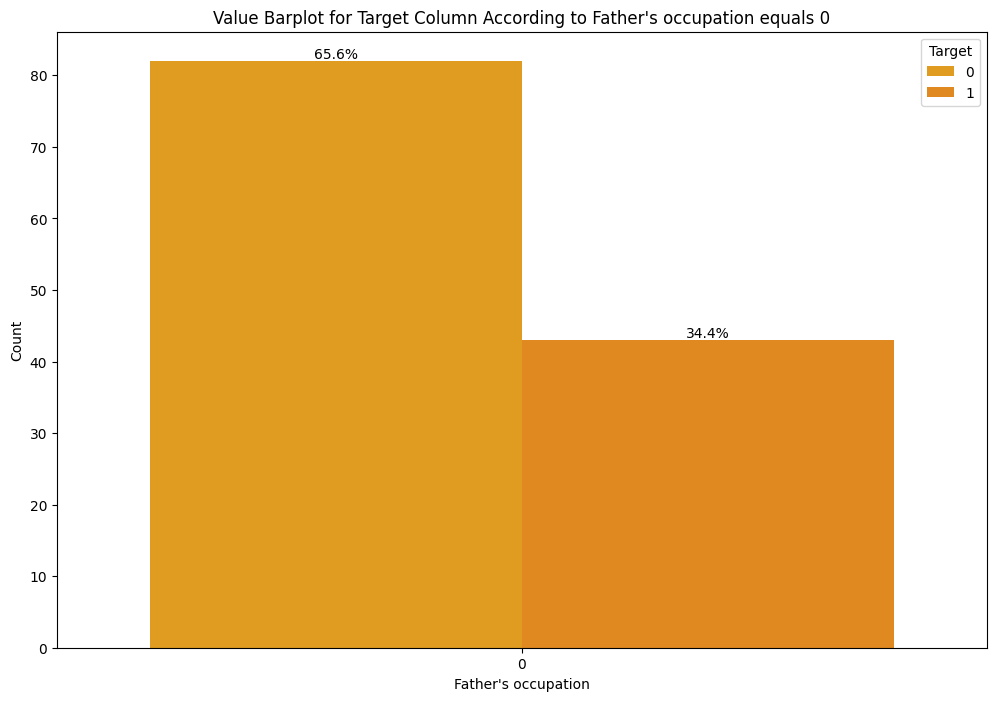

In [523]:
# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Filter the data for the specific value of `col_name`
filtered_data = df_grouped[df_grouped[col_name] == value_to_check_for]

# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


#### Admission grade

In [528]:
col_name = "Admission grade"
target = "Target"
value_to_check_for = 90

df[col_name].value_counts()

Admission grade
130.0    125
120.0    120
140.0    116
100.0     91
150.0     67
        ... 
158.3      1
159.1      1
154.9      1
150.4      1
166.0      1
Name: count, Length: 601, dtype: int64

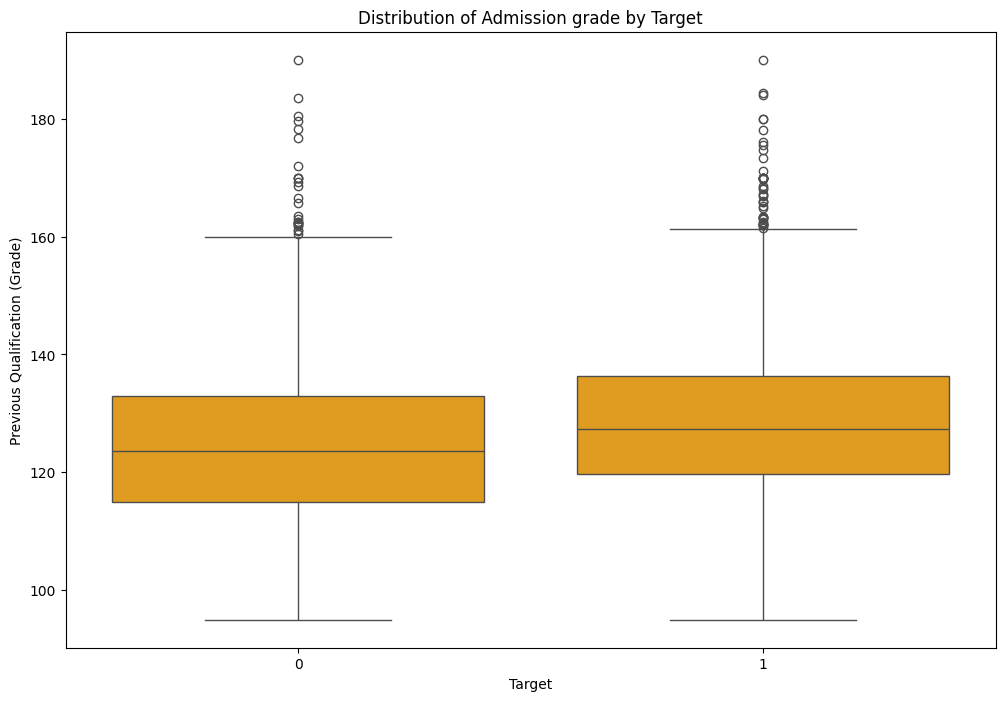

In [529]:
# Group by VAR and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')


# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x=target, y=col_name, data=df)
plt.title(f'Distribution of {col_name} by {target}')
plt.xlabel('Target')
plt.ylabel('Previous Qualification (Grade)')
plt.show()


On observe comme attendu que la note d'admission a un impact important sur le succès scolaire en moyenne, mais les deux classes présentent bien des éléments performants et en échec scolaires tout de même.

#### Displaced

In [538]:
col_name = "Displaced"
target = "Target"
value_to_check_for = 1

df[col_name].value_counts()

Displaced
1    1991
0    1630
Name: count, dtype: int64

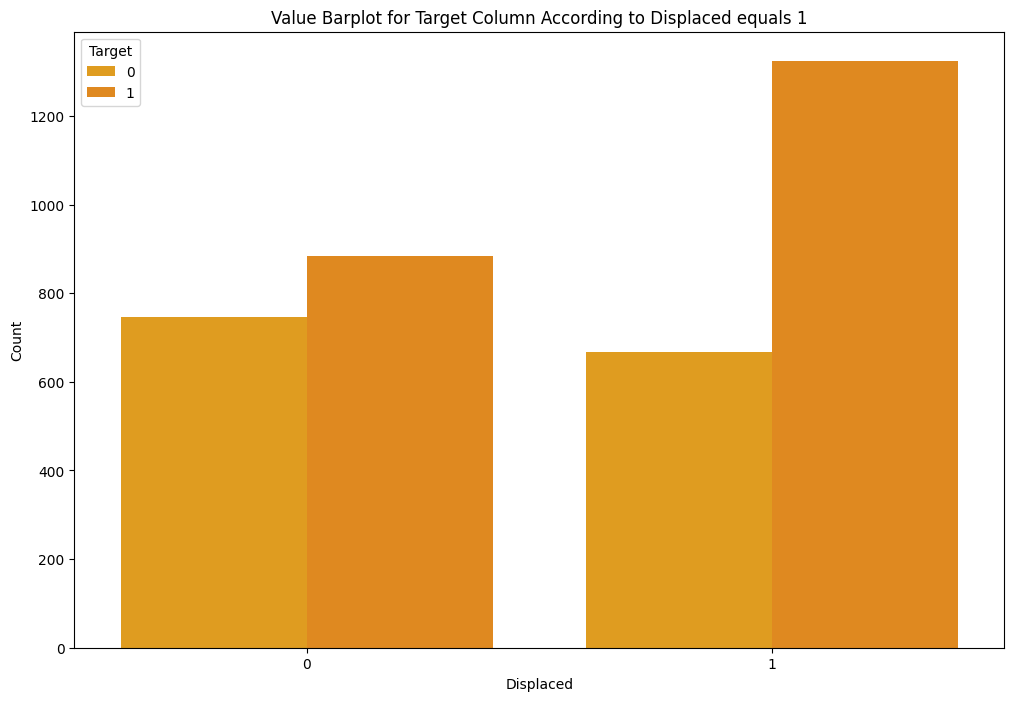

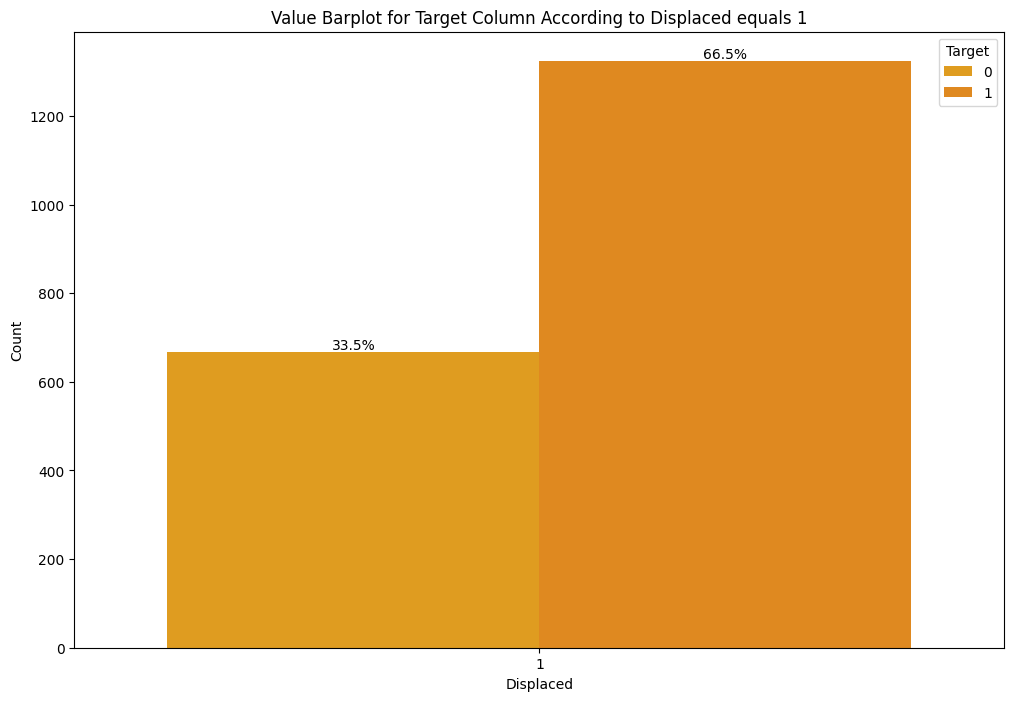

In [539]:
# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Filter the data for the specific value of `col_name`
filtered_data = df_grouped[df_grouped[col_name] == value_to_check_for]

# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


Honnêtement je comprends pas très bien la feature et ce qu'elle signifie même elle semble avoir le potentiel d'être impactante

#### Educational special needs

In [542]:
col_name = "Educational special needs"
target = "Target"
value_to_check_for = 1

df[col_name].value_counts()

Educational special needs
0    3581
1      40
Name: count, dtype: int64

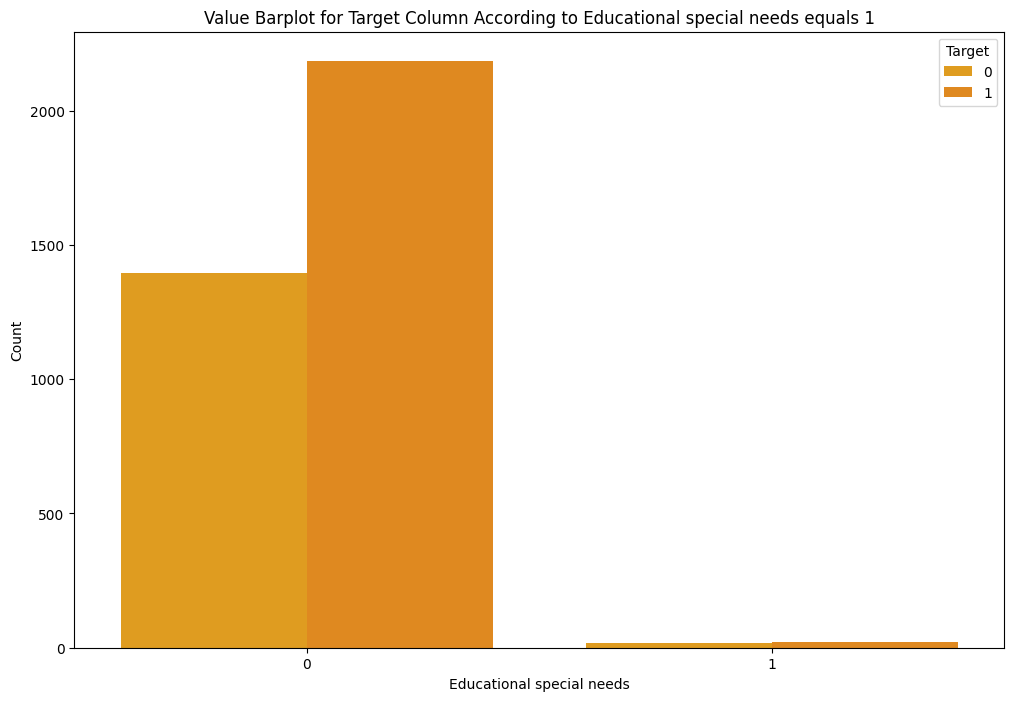

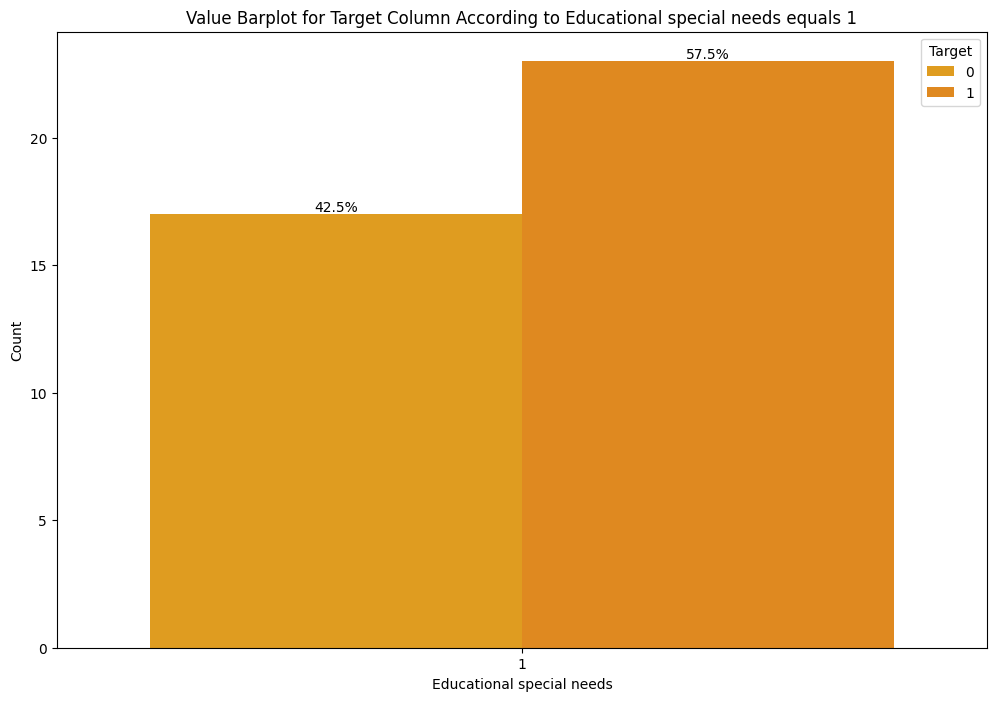

In [543]:
# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Filter the data for the specific value of `col_name`
filtered_data = df_grouped[df_grouped[col_name] == value_to_check_for]

# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


On remarque un taux plus important d'échec chez les étudiants ayant des besoins spécifiques en éducation.

#### Debtor

In [550]:
col_name = "Debtor"
target = "Target"
value_to_check_for = 1

df[col_name].value_counts()

Debtor
0    3213
1     408
Name: count, dtype: int64

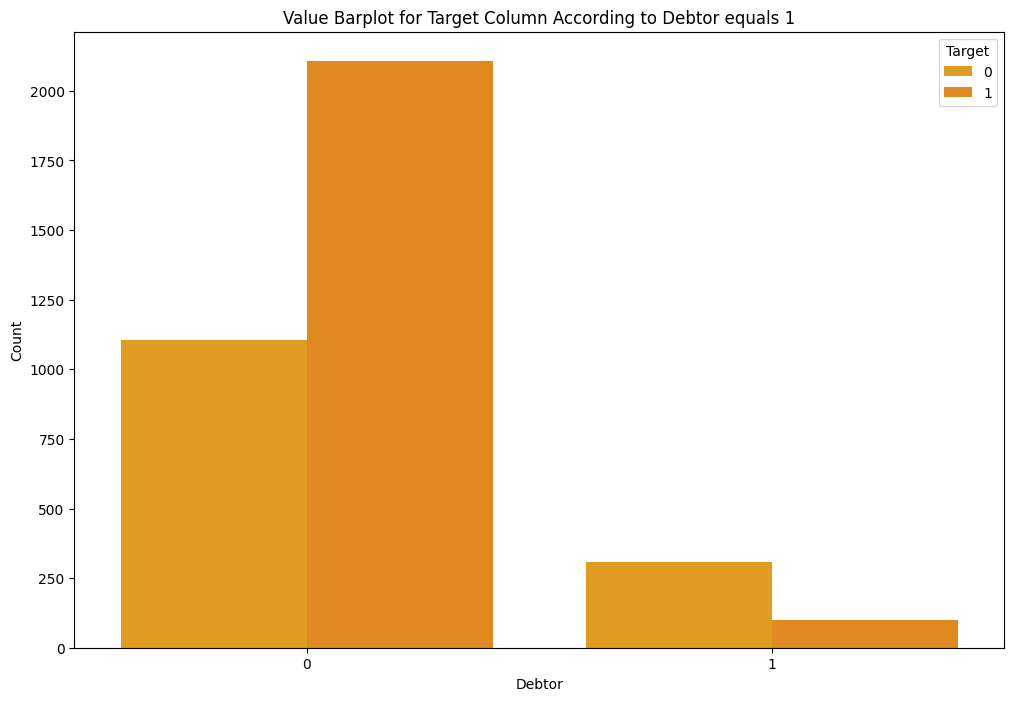

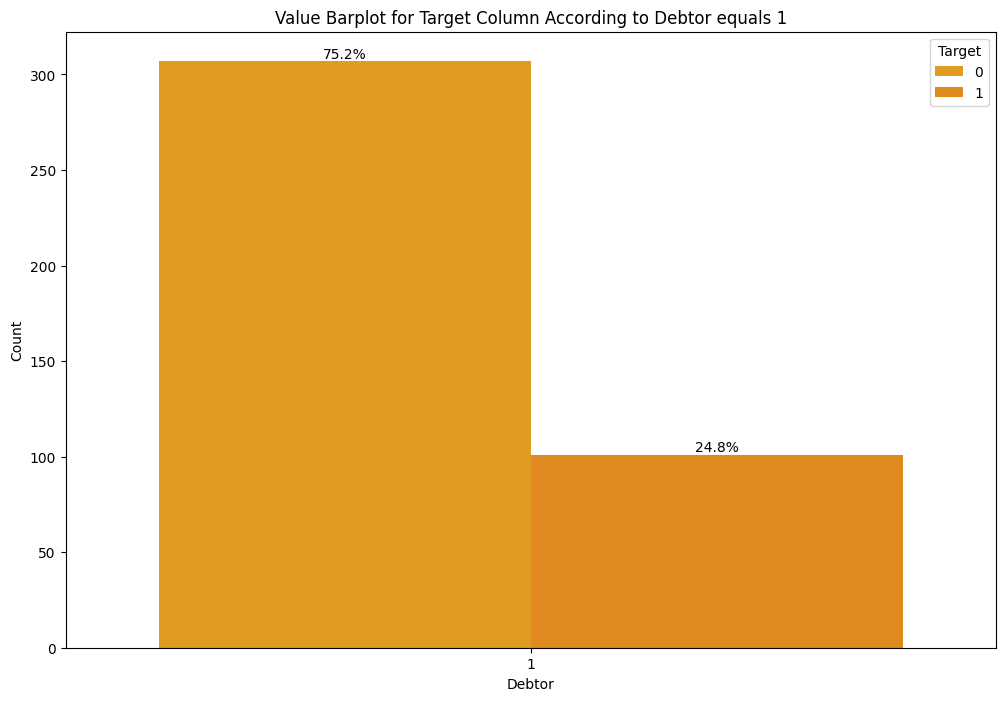

In [551]:
# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Filter the data for the specific value of `col_name`
filtered_data = df_grouped[df_grouped[col_name] == value_to_check_for]

# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


Les étudiants endetté ont de grande difficulté au seins de l'établissement, il est probable que cela soit lié à plusieurs autres variables également présentes ou non dans le dataset comme la nécessité de travailler pour payer ses dettes, d'autres enjeux financiers pourraient également mettre leurs études à mal ou encore on pourrait s'imaginer que la pression soit plus grande et rende l'apprentissage plus pernicieux.

#### Tuition fees up to date

In [552]:
col_name = "Tuition fees up to date"
target = "Target"
value_to_check_for = 0

df[col_name].value_counts()

Tuition fees up to date
1    3138
0     483
Name: count, dtype: int64

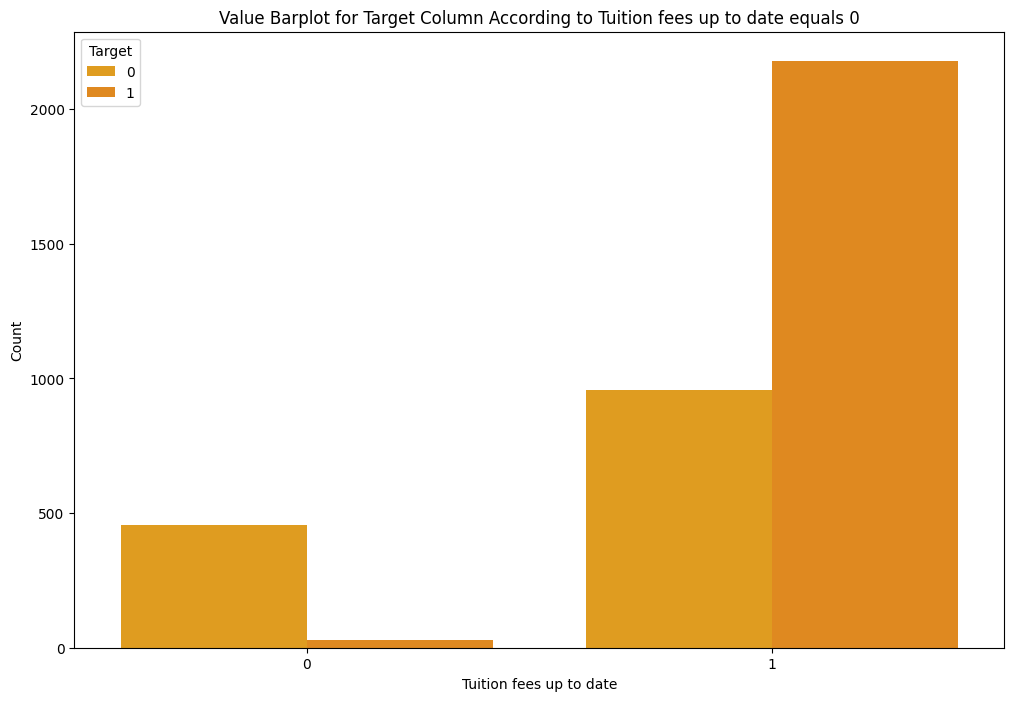

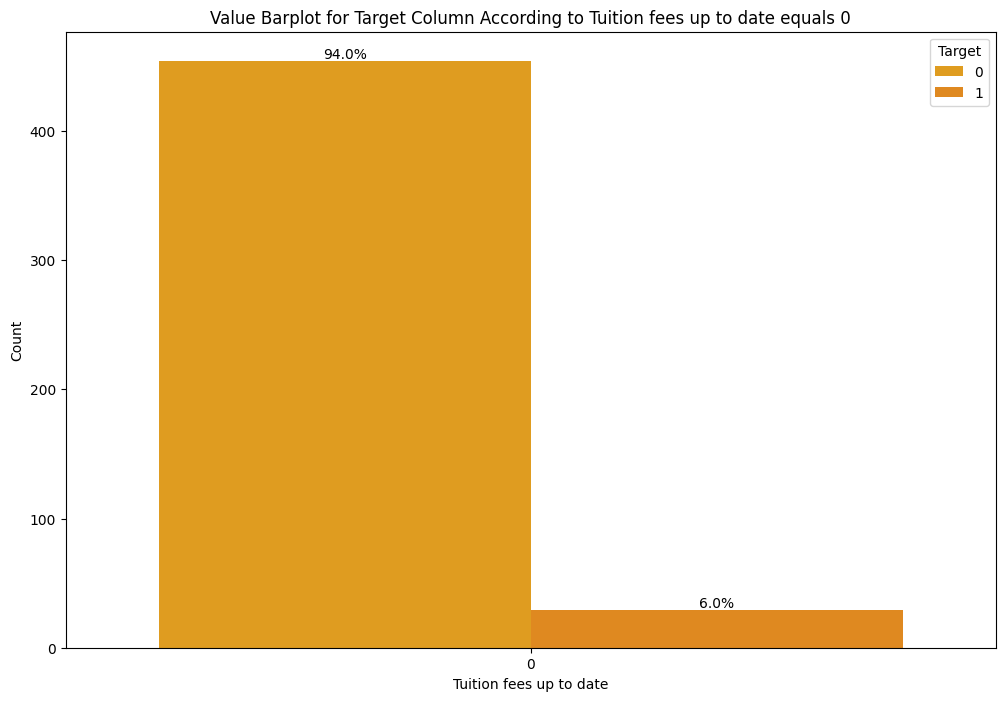

In [553]:
# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Filter the data for the specific value of `col_name`
filtered_data = df_grouped[df_grouped[col_name] == value_to_check_for]

# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


Alors les chiffres sont assez proche de debtor mais vu le faible pourcentage de réussite des étudiants n'ayant pas intégralement payer leurs frais d'études, il est peu probable que ces variables soient directement liées. On imagine que les debtors ne sont pas inclus dans la classe 0.

#### Gender (1 men 0 women)

In [556]:
col_name = "Gender"
target = "Target"
value_to_check_for = 0

df[col_name].value_counts()

Gender
0    2379
1    1242
Name: count, dtype: int64

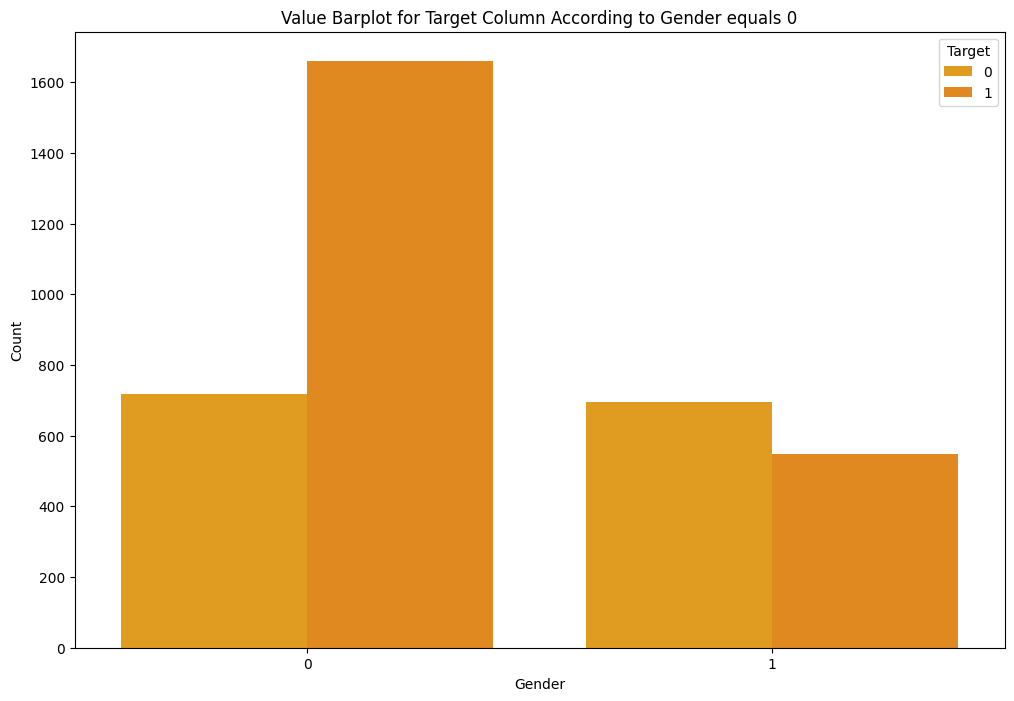

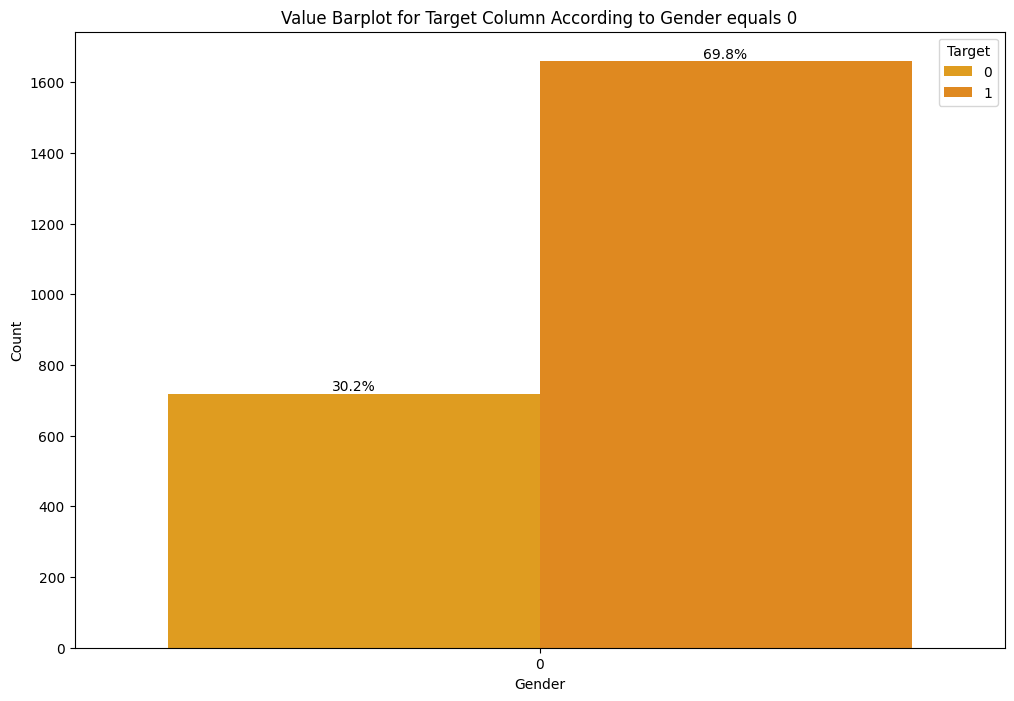

In [557]:
# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Filter the data for the specific value of `col_name`
filtered_data = df_grouped[df_grouped[col_name] == value_to_check_for]

# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


On remarque que contrairement aux hommes, les femmes sont bien plus performantes en terme de réussite scolaire dans notre échantillon, ce qui est d'une part une tendance mondiale qui prend de plus en plus d'ampleur, et d'autres part concerne probablement un secteur d'activité dans lesquelles les femmes sont plus performantes, étant données que les stats réels de réussite homme/femme sont plus de l'ordre 40%/60% en général que du 30%/70% 

#### Scholarship holder

In [560]:
col_name = "Scholarship holder"
target = "Target"
value_to_check_for = 1

df[col_name].value_counts()

Scholarship holder
0    2652
1     969
Name: count, dtype: int64

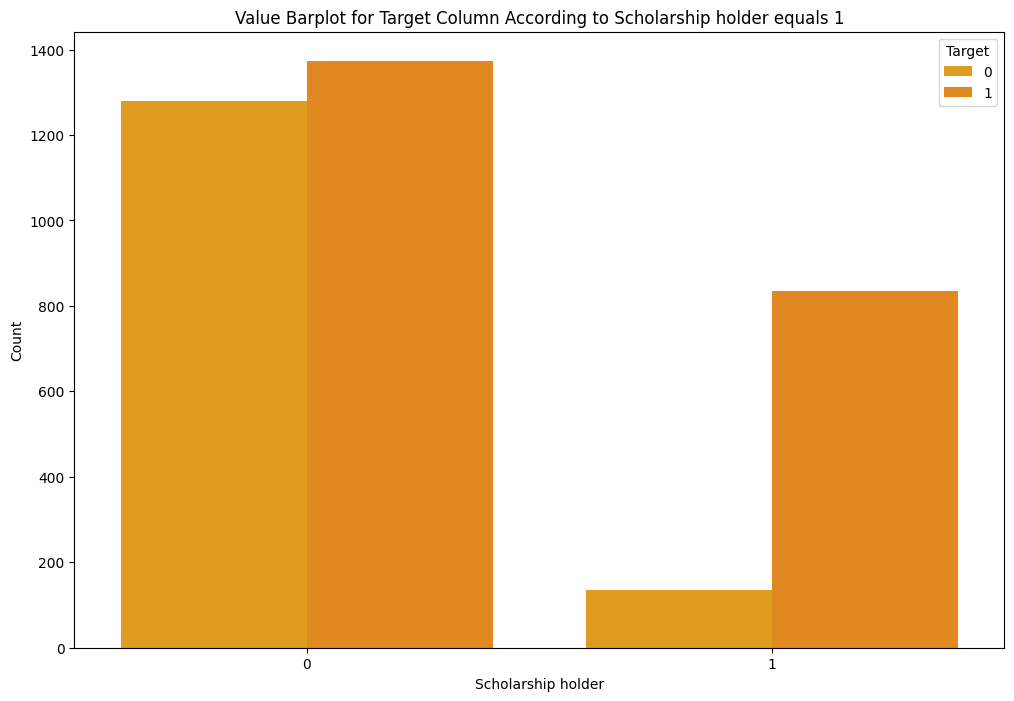

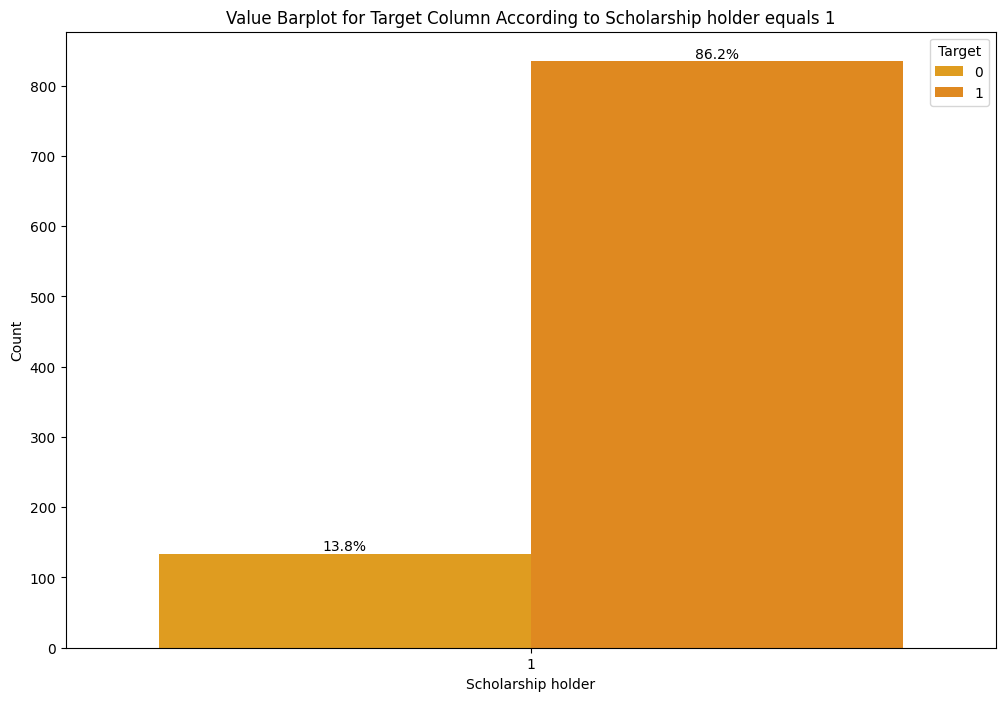

In [561]:
# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Filter the data for the specific value of `col_name`
filtered_data = df_grouped[df_grouped[col_name] == value_to_check_for]

# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


Comme attendu, les étudiants disposant de bourses sont généralement très prometteurs et performants.

#### Age at enrollment

In [572]:
col_name = "Age at enrollment"
target = "Target"
value_to_check_for = [18, 19, 20, 21, 22, 23, 24, 25]

df[col_name].value_counts()

Age at enrollment
18    864
19    754
20    459
21    252
22    137
24    101
23     84
27     79
26     74
25     70
28     68
29     61
32     55
31     48
34     47
30     43
35     41
33     37
37     36
39     33
36     32
41     26
38     25
43     22
40     19
44     19
45     18
47     16
50     14
49     12
46     12
42     11
48      8
51      7
53      6
54      6
55      5
52      4
58      3
59      3
17      3
60      2
57      2
70      1
61      1
62      1
Name: count, dtype: int64

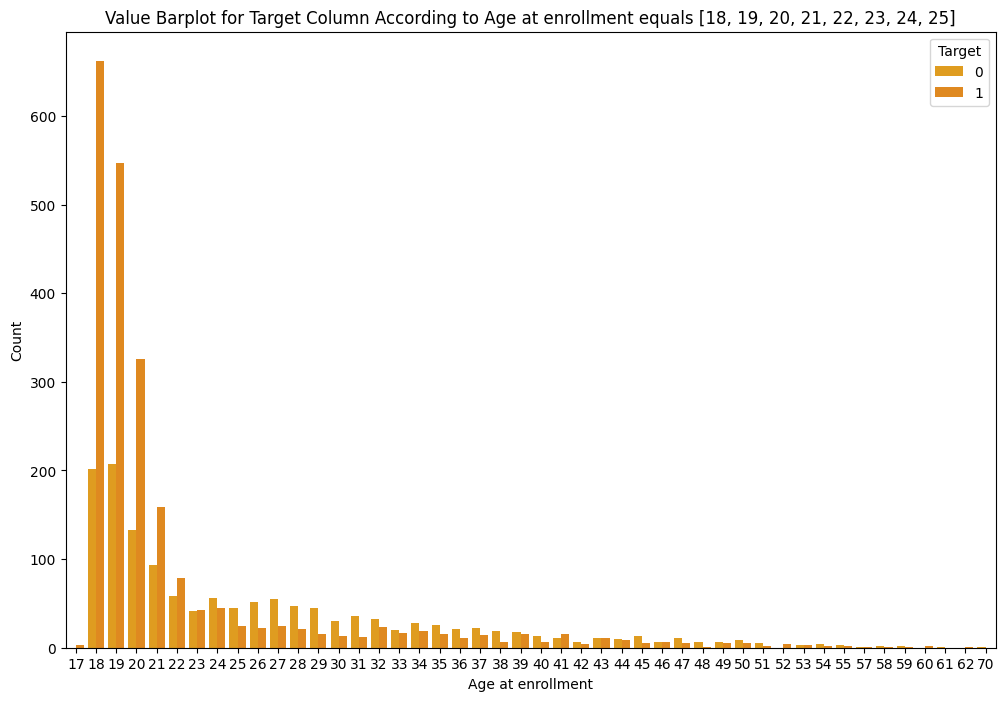

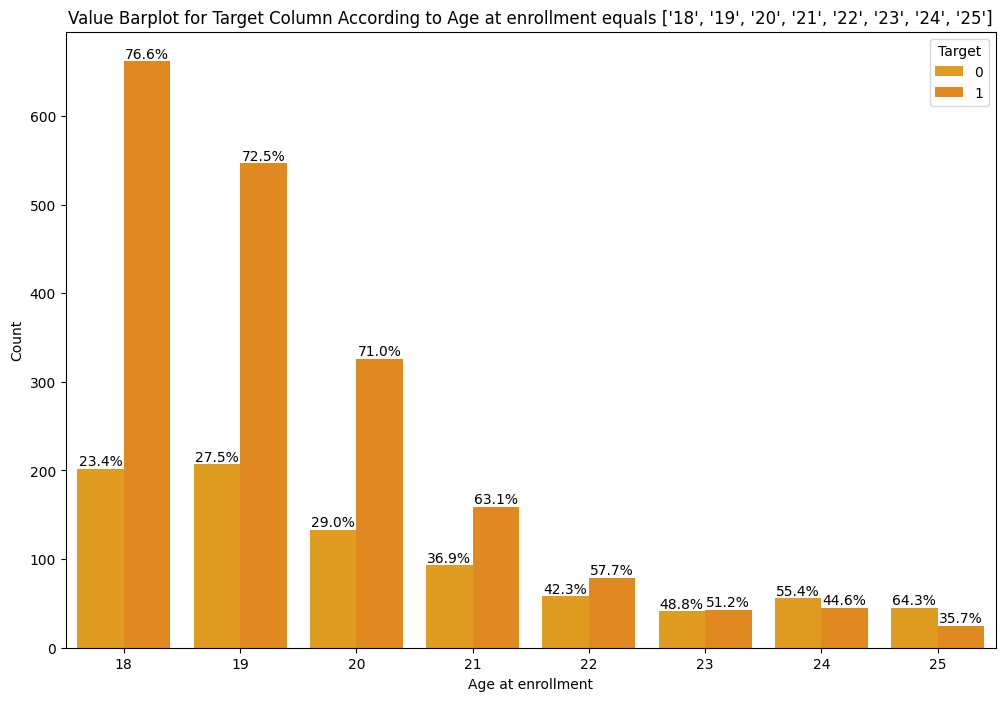

In [573]:
# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Ensure the column and value to check are treated as strings
df_grouped[col_name] = df_grouped[col_name].astype(str)
value_to_check_for = [str(v) for v in value_to_check_for]

# Filter the data for the specific value(s) of `col_name`
filtered_data = df_grouped[df_grouped[col_name].isin(value_to_check_for)]


# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


On remarque une décroissance assez linéaire entre l'âge à l'entrée et la probabilité de réussite. Cela peut être dû au fait que les étudiants plus âgées ont un parcours académique précédent moins réussit ou que les étudiants plus âgés ont plus de responsabilités et moins de temps pour étudier, ce qui peut affecter leurs performances académiques.

#### International

In [577]:
col_name = "International"
target = "Target"
value_to_check_for = [0, 1]

df[col_name].value_counts()

International
0    3536
1      85
Name: count, dtype: int64

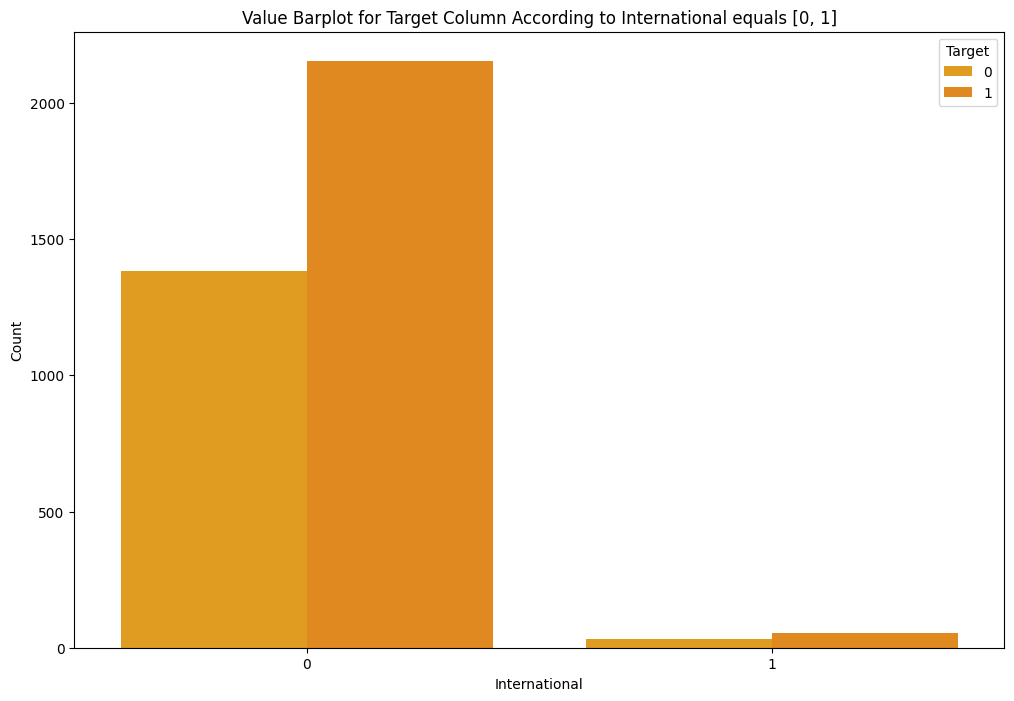

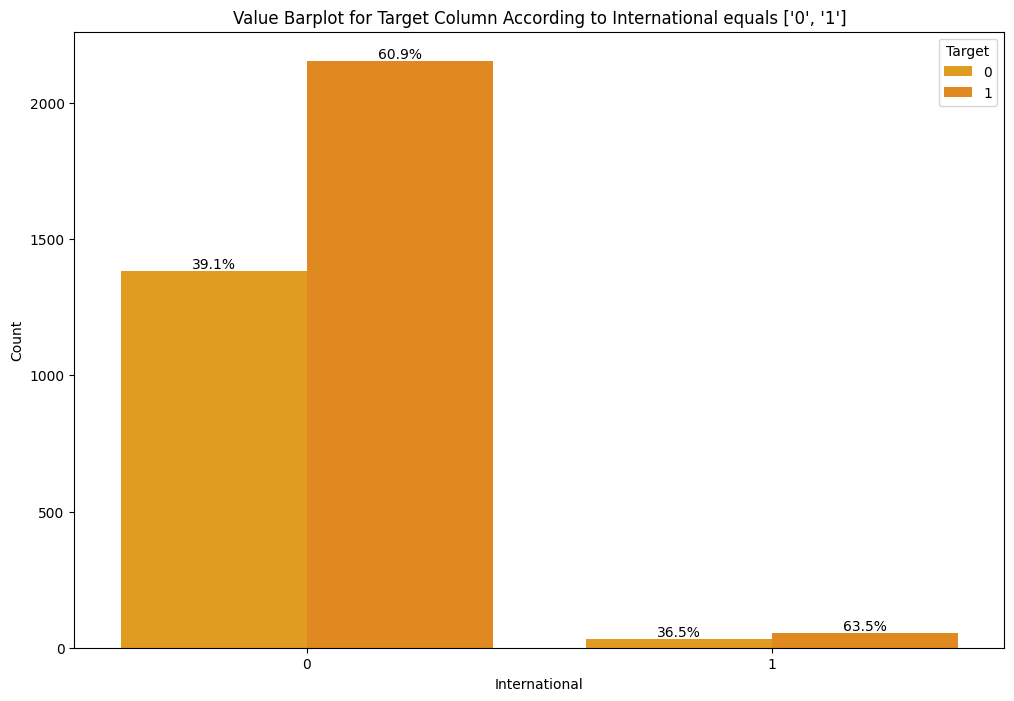

In [578]:
# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Ensure the column and value to check are treated as strings
df_grouped[col_name] = df_grouped[col_name].astype(str)
value_to_check_for = [str(v) for v in value_to_check_for]

# Filter the data for the specific value(s) of `col_name`
filtered_data = df_grouped[df_grouped[col_name].isin(value_to_check_for)]


# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


#### Curricular units 1st sem & 2nd sem (credited)

In [585]:
col_name = "Curricular units 1st sem (credited)"
target = "Target"
value_to_check_for = [0, 1, 2, 3, 4]

df[col_name].value_counts()

Curricular units 1st sem (credited)
0     3145
2       71
1       67
3       56
6       43
4       43
5       31
7       31
8       27
9       24
11      16
10      13
14      13
13      12
12      11
15       5
18       3
17       3
16       3
19       2
20       2
Name: count, dtype: int64

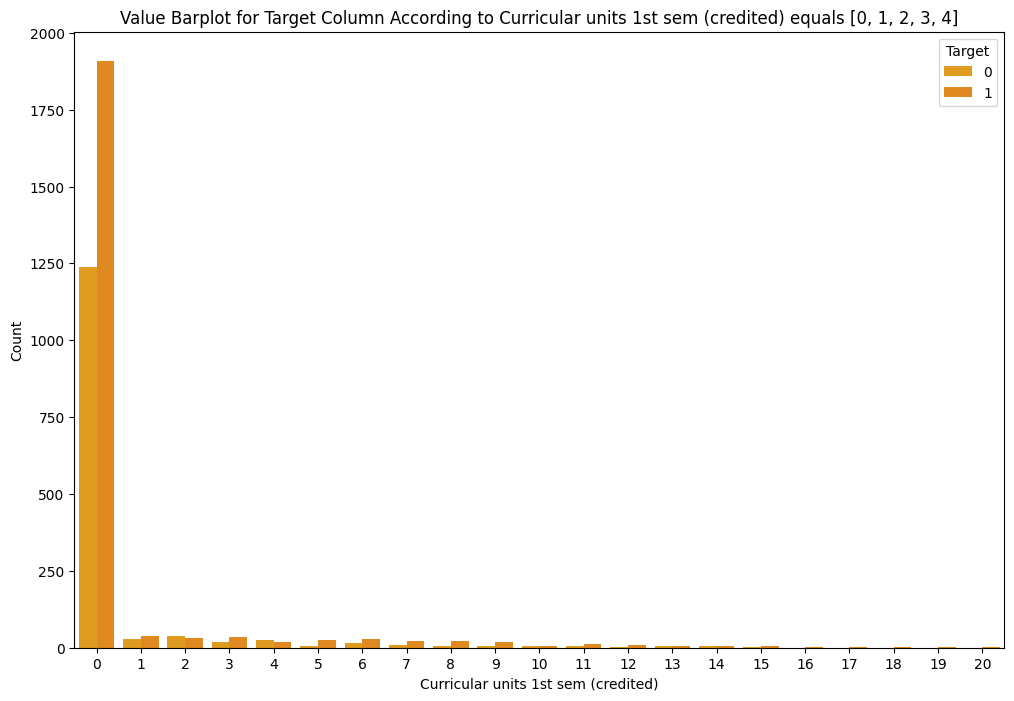

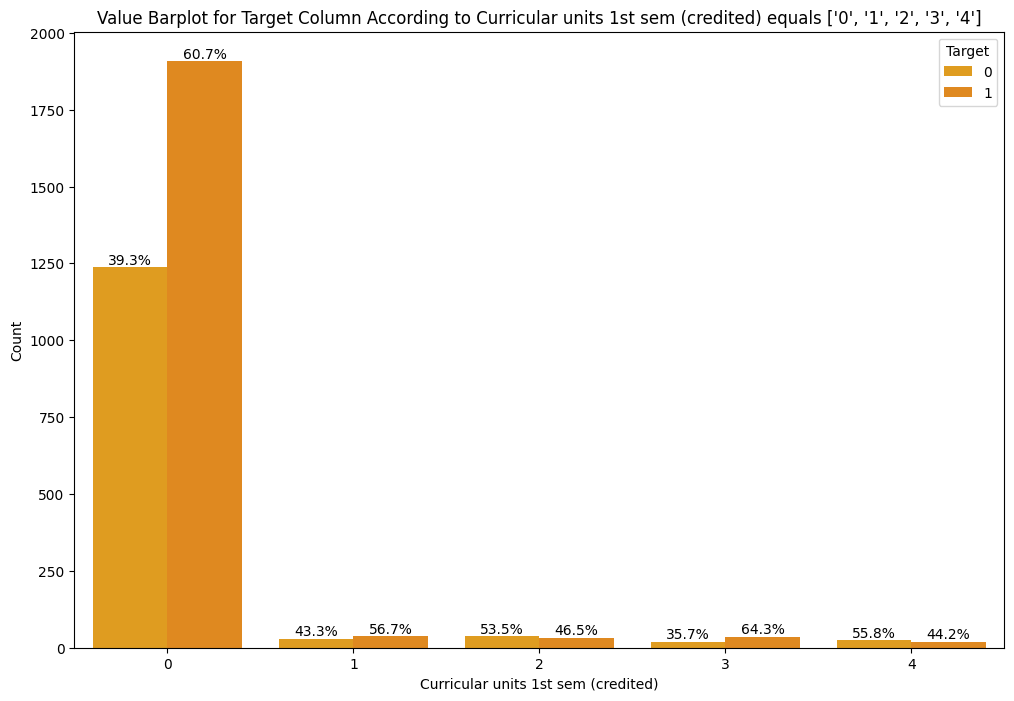

In [586]:
# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Ensure the column and value to check are treated as strings
df_grouped[col_name] = df_grouped[col_name].astype(str)
value_to_check_for = [str(v) for v in value_to_check_for]

# Filter the data for the specific value(s) of `col_name`
filtered_data = df_grouped[df_grouped[col_name].isin(value_to_check_for)]


# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


wow j'y comprends plus rien, on va valider avec Kawther que valider aucun bloc augmente nos chances de réussir la formation

- Curricular units 2nd sem (credited)

In [589]:
col_name = "Curricular units 2nd sem (credited)"
target = "Target"
value_to_check_for = [0, 1 , 2 , 3, 4]

df[col_name].value_counts()

Curricular units 2nd sem (credited)
0     3178
1       81
2       80
4       61
5       60
3       40
6       24
11      20
9       13
7       12
12      12
10      10
8       10
13       9
14       4
15       2
16       2
18       2
19       1
Name: count, dtype: int64

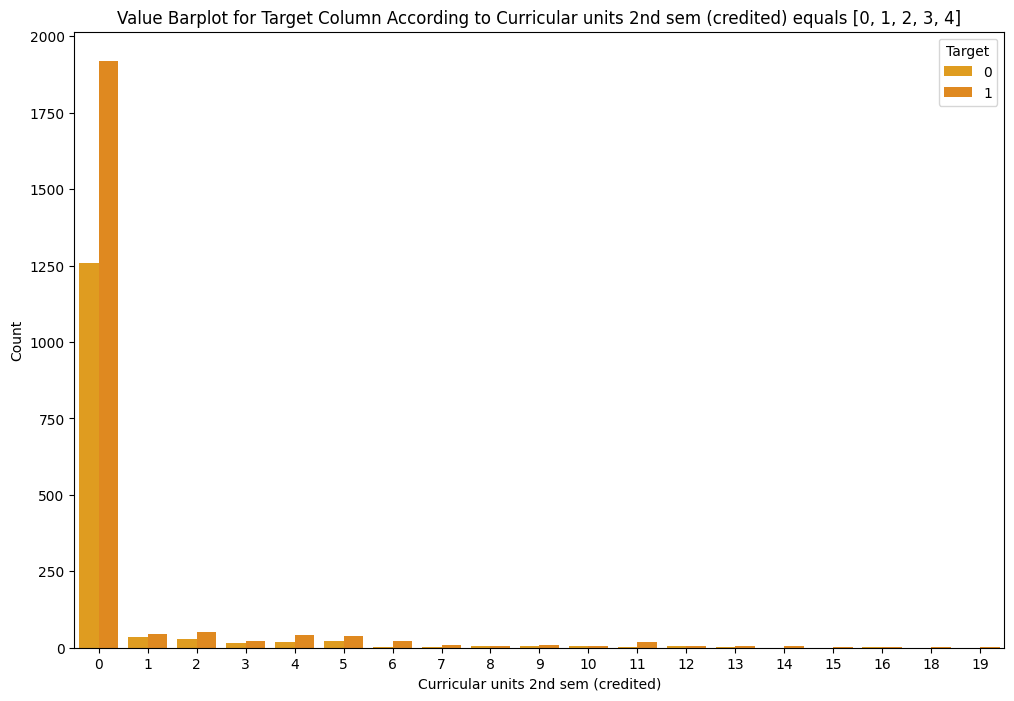

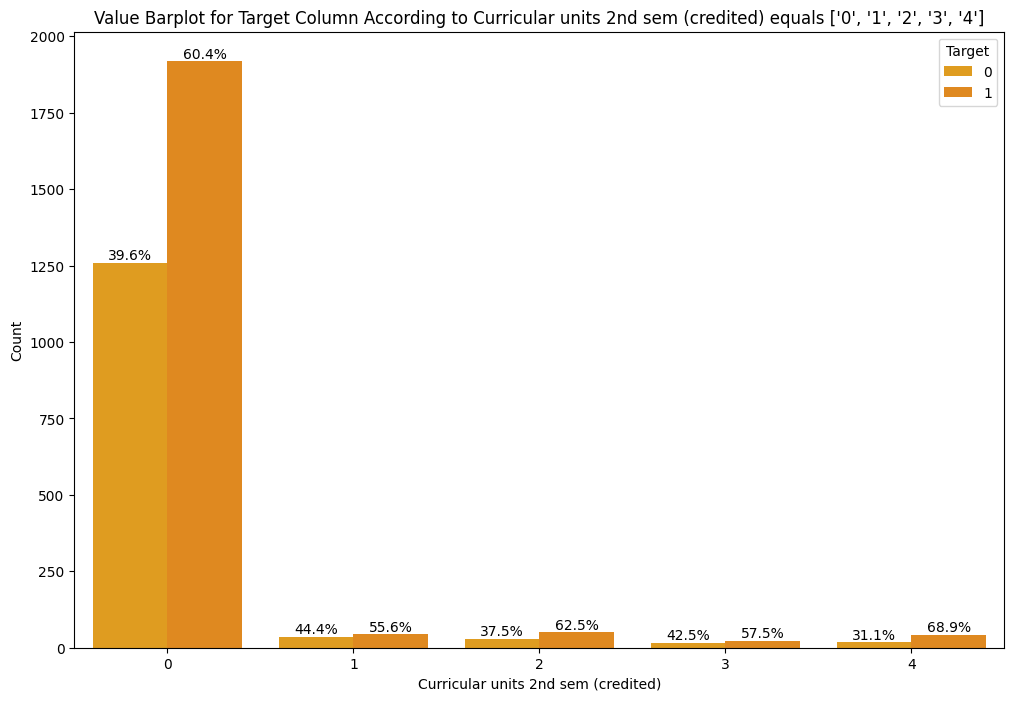

In [594]:
value_to_check_for = [0, 1 , 2 , 3, 4]


# Group by 'Marital status' and 'Target' and count the occurrences
df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()

# Calculate the total count for each `col_name` group
df_grouped['percentage'] = (
    df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
)

# Ensure the column and value to check are treated as strings
df_grouped[col_name] = df_grouped[col_name].astype(str)
value_to_check_for = [str(v) for v in value_to_check_for]

# Filter the data for the specific value(s) of `col_name`
filtered_data = df_grouped[df_grouped[col_name].isin(value_to_check_for)]


# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# Annotate the bars with percentages
containers = ax.containers

# Iterate over pairs of bars in the barplot
for i in range(len(filtered_data[col_name].unique())):
    # Bars for Target=0 and Target=1
    bar_0 = containers[0][i]  # Bar for Target=0
    bar_1 = containers[1][i]  # Bar for Target=1

    # Get the heights of the bars
    height_0 = bar_0.get_height()
    height_1 = bar_1.get_height()

    # Percentages
    percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
    percentage_0 = 100 - percentage_1                          # Target=0 percentage

    # Annotate Target=1
    if height_1 > 0:
        ax.text(
            bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
            height_1,  # Position at the top of the bar
            f'{percentage_1:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Annotate Target=0
    if height_0 > 0:
        ax.text(
            bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
            height_0,  # Position at the top of the bar
            f'{percentage_0:.1f}%',  # Format percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set plot titles and labels
plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
plt.xlabel(col_name)
plt.ylabel('Count')
plt.legend(title=target)
plt.show()


Bon là c'est déjà bien plus cohérents mais on va regarder pour 14+

In [596]:
# value_to_check_for = [14, 15, 16, 18, 19]

# # Group by 'Marital status' and 'Target' and count the occurrences
# df_grouped = df.groupby([col_name, target]).size().reset_index(name='count')

# # Plot the barplot
# plt.figure(figsize=(12, 8))
# sns.barplot(x=col_name, y='count', hue=target, data=df_grouped)
# plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
# plt.xlabel(col_name)
# plt.ylabel('Count')
# plt.legend(title=target)
# plt.show()

# # Calculate the total count for each `col_name` group
# df_grouped['percentage'] = (
#     df_grouped['count'] / df_grouped.groupby(col_name)['count'].transform('sum') * 100
# )

# # Ensure the column and value to check are treated as strings
# df_grouped[col_name] = df_grouped[col_name].astype(str)
# value_to_check_for = [str(v) for v in value_to_check_for]

# # Filter the data for the specific value(s) of `col_name`
# filtered_data = df_grouped[df_grouped[col_name].isin(value_to_check_for)]


# # Plot the barplot
# plt.figure(figsize=(12, 8))
# ax = sns.barplot(x=col_name, y='count', hue=target, data=filtered_data)

# # Annotate the bars with percentages
# containers = ax.containers

# # Iterate over pairs of bars in the barplot
# for i in range(len(filtered_data[col_name].unique())):
#     # Bars for Target=0 and Target=1
#     bar_0 = containers[0][i]  # Bar for Target=0
#     bar_1 = containers[1][i]  # Bar for Target=1

#     # Get the heights of the bars
#     height_0 = bar_0.get_height()
#     height_1 = bar_1.get_height()

#     # Percentages
#     percentage_1 = filtered_data.iloc[i * 2 + 1]['percentage']  # Target=1 percentage
#     percentage_0 = 100 - percentage_1                          # Target=0 percentage

#     # Annotate Target=1
#     if height_1 > 0:
#         ax.text(
#             bar_1.get_x() + bar_1.get_width() / 2,  # Center text horizontally
#             height_1,  # Position at the top of the bar
#             f'{percentage_1:.1f}%',  # Format percentage
#             ha='center', va='bottom', fontsize=10, color='black'
#         )

#     # Annotate Target=0
#     if height_0 > 0:
#         ax.text(
#             bar_0.get_x() + bar_0.get_width() / 2,  # Center text horizontally
#             height_0,  # Position at the top of the bar
#             f'{percentage_0:.1f}%',  # Format percentage
#             ha='center', va='bottom', fontsize=10, color='black'
#         )

# # Set plot titles and labels
# plt.title(f'Value Barplot for Target Column According to {col_name} equals {value_to_check_for}')
# plt.xlabel(col_name)
# plt.ylabel('Count')
# plt.legend(title=target)
# plt.show()


ça casse un peu le code mais comme attendu les étudiants ayant validé quasimment tous les blocs réussissent sauf outliers qui sont probablement pour des raisons extra scolaires. ( ou peut être ont ratés un ou plusieurs blocs dont la validation est obligatoire)

In [583]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

## Bruh

In [482]:

# Define thenumeric, categorical vars, and vars already preprocessed
numeric_features = df.select_dtypes(exclude=['object']).columns
categorical_features = df.select_dtypes(include=['object']).columns


# Define the preprocessing for numeric features
# numeric_features = df.select_dtypes(exclude=['object']).columns
# categorical_features = df.select_dtypes(include=['object']).columns

In [483]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=1)

In [484]:
X_train_preprocessed = X_train.copy()

In [485]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define the transformer for already transformed variables
already_transformed_features = ['list_of_already_transformed_features']  # Replace with actual feature names

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # This keeps any remaining columns as-is
)


# Apply the preprocessing pipeline
preproc_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


In [486]:
preproc_pipeline.fit_transform(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [558]:
# Train the regression model
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [559]:
y_train

1501    0
2704    1
4283    0
1288    1
137     1
       ..
2895    1
2763    1
905     1
3980    1
235     1
Name: Target, Length: 3096, dtype: int64

In [568]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model using regression metrics
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc}")


Accuracy: 0.8810240963855421


In [620]:
# Ce sera réalisé plus tard mais on le conserve ici également.

# # Top 10 des variables les plus influentes
numeric_df["Target"] == pd.Series(y_transformed)
features_correlated = numeric_df.corr()['Target'].abs().sort_values(ascending=False)
# excluding Target
print(features_correlated.index[1:11])
features_correlated

KeyError: 'Target'

### Data Cleaning

S'agissant de données médicales, sans l'avis d'un expert, nous ne nous permettons pas d'exclure des données, consulter un tel expert nous permettrait d'avoir une vision plus claire des données dispensables.

##### Balancing the target (Undersampling)

As we don't operate oversampling on medical data, we'll have to undersample the data

Target is already converted to binary at this point.

## Isolating changes made for future pipeline

In [80]:
# don't forget to do the balancing and every other operations after it again.

## Preparing for Deep Learning

### Feature Selection / Dimensionality Reduction

#### Convolution Matrix feature importance

In [621]:
numeric_df.shape
y_transformed.shape

(4424,)

In [570]:
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Get the correlation values with the target variable 'Target'
correlation_with_target = correlation_matrix["Target"].abs().sort_values(ascending=False)

# Select features with high correlation with the target variable
# Here, we choose a threshold of 0.5 for high correlation, but you can adjust this value
high_correlation_features = correlation_with_target[correlation_with_target > 0.5].index.tolist()

# Remove the target variable from the list of selected features
high_correlation_features.remove("Target")

print("Selected features based on correlation with target variable:")
print("retained features:",high_correlation_features)

# Highlight features not retained
all_features = numeric_df.columns.tolist()
not_retained_features = list(set(all_features) - set(high_correlation_features) - {"Target"})

print("\nFeatures not retained based on correlation with target variable:")
print("not retained features:", not_retained_features)

KeyError: 'Target'

#### Experimentation: Shap Feature Importance on a basic Random Forest for reference

This is just used as a mean to compare with our feature selection algorythms to identify some values we may have missed out on.
It is not used in our following Feature selection

In [160]:
X_encoded.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment 

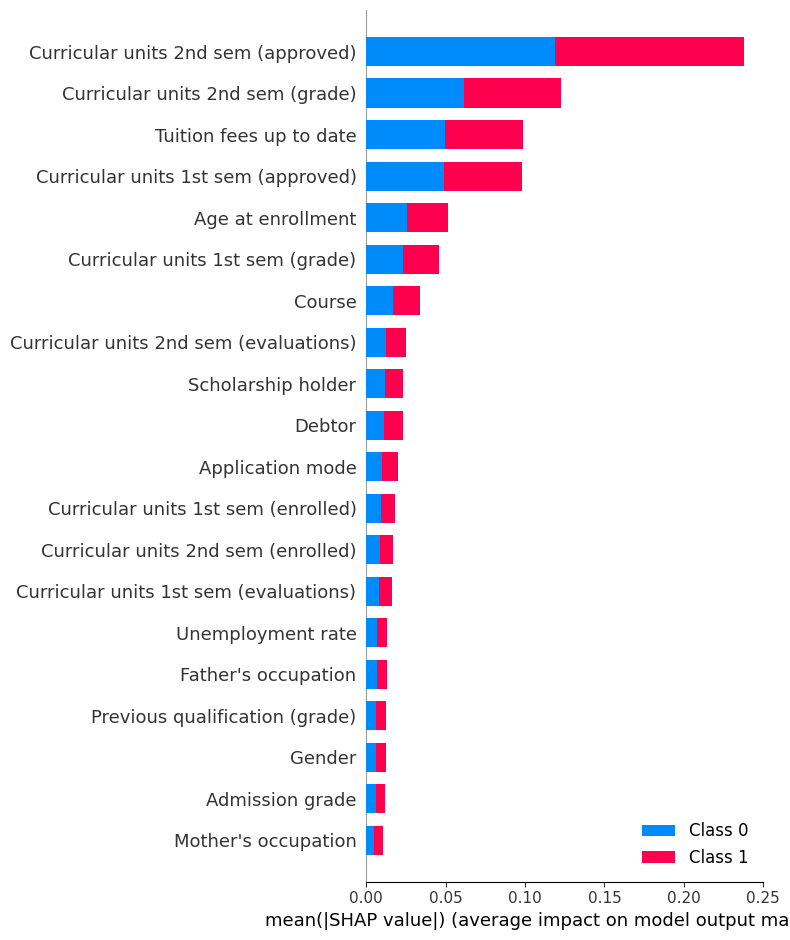

In [622]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# shap.summary_plot(shap_values[0], X_test)
# shap.dependence_plot("radius_worst", shap_values[0], X_test,interaction_index="perimeter_worst")
# shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)
# shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :],matplotlib = True)
# impact_scores = np.abs(shap_values[1]).sum(axis=1)
# most_impactful_index = np.argmax(impact_scores)  # Gives the index of the most impactful sample
# impact_scores

In [ ]:
import numpy as np

# Sum of absolute SHAP values across all samples for each feature
feature_impact_scores = np.abs(shap_values.values).sum(axis=0)

# Creating a dictionary with feature names and their associated impact scores
impact_scores_dict = dict(zip(X_test.columns, feature_impact_scores))

# Sorting the dictionary by values (impact scores) in descending order
sorted_impact_scores_dict = dict(sorted(impact_scores_dict.items(), key=lambda item: item[1], reverse=True))

# Printing the sorted impact scores
print(sorted_impact_scores_dict)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

#### Boruta

In [250]:
# Boruta is not up to date with the latests versions of numpy so we need to do this to fix the int error
np.int = np.int32
np.float = np.float64
np.bool = np.bool_


# Get the names of the features
features_names = X_encoded.columns

rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=5)

feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)

# find all relevant features
feat_selector.fit(X_encoded, df.Target.values)

# check selected features
print(feat_selector.support_)


# check ranking of features
print(feat_selector.ranking_)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	7
Rejected: 	22
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	7
Rejected: 	22
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	7
Rejected: 	22
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	7
Rejected: 	22
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	22
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	22
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	22
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	22
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	5
Rejected: 	23
I

In [249]:
X_encoded.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment 

In [251]:
feat_selector.support_

array([False,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True,  True, False, False, False,  True, False,  True])

In [252]:
# Map the boolean array to feature names
boruta_selected_features = features_names[feat_selector.support_]

# Convert to a list (if needed)
boruta_selected_features_list = boruta_selected_features.tolist()
boruta_selected_features_list

['Application mode',
 'Course',
 'Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'GDP',
 'Target_Graduate']

Glyph 9 (	) missing from current font.


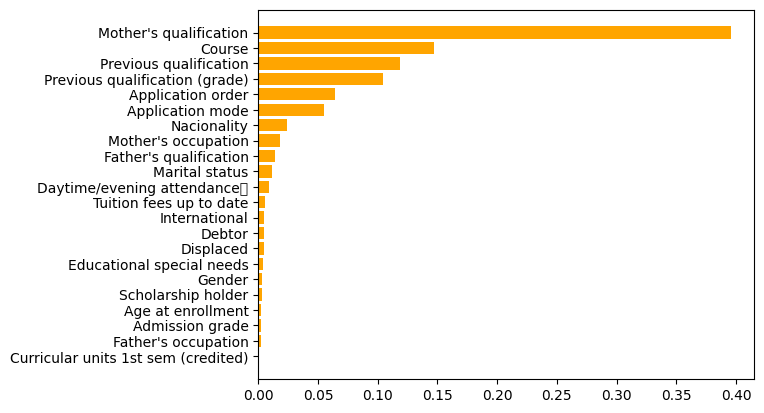

In [253]:
from sklearn.feature_selection import RFECV

f_i = list(zip(features_names,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()


In [254]:
rfe = RFECV(estimator=rf, cv=5, scoring="neg_mean_squared_error", verbose=1, importance_getter='auto')
rfe.fit(X_train, y_train)


Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 fea

RFECV(cv=5,
      estimator=RandomForestRegressor(max_depth=5, n_estimators=93, n_jobs=-1,
                                      random_state=RandomState(MT19937) at 0x7FAC33BD0940),
      scoring='neg_mean_squared_error', verbose=1)

In [255]:
# Get the ranking of features
feature_ranking = rfe.ranking_

# Normalize the ranking to a scale from 0 to 1
normalized_ranking = (feature_ranking - feature_ranking.min()) / (feature_ranking.max() - feature_ranking.min())

# Create a DataFrame to display the feature names and their normalized ranking
feature_importance_df = pd.DataFrame({
    'Feature': features_names,
    'Normalized Ranking': normalized_ranking
})

print(feature_importance_df)

                                           Feature  Normalized Ranking
0                                   Marital status            0.611111
1                                 Application mode            0.000000
2                                Application order            0.722222
3                                           Course            0.000000
4                     Daytime/evening attendance\t            0.277778
5                           Previous qualification            0.000000
6                   Previous qualification (grade)            0.000000
7                                      Nacionality            0.666667
8                           Mother's qualification            0.222222
9                           Father's qualification            0.111111
10                             Mother's occupation            0.000000
11                             Father's occupation            0.000000
12                                 Admission grade            0.000000
13    

In [46]:
df["Mother's qualification"].value_counts()

Mother's qualification
1     1069
37    1009
19     953
38     562
3      438
34     130
2       83
4       49
12      42
5       21
40       9
9        8
39       8
41       6
6        4
42       4
43       4
29       3
10       3
11       3
36       3
35       3
30       3
14       2
18       1
22       1
27       1
26       1
44       1
Name: count, dtype: int64

In [259]:
rf_selected_features = np.array(features_names)[rfe.get_support()]
print(rf_selected_features)

# Get the ranking of features
feature_ranking = rfe.ranking_

# Normalize the ranking to a scale from 0 to 1
normalized_ranking = (1 - (feature_ranking - feature_ranking.min()) / (feature_ranking.max() - feature_ranking.min()))*5
# normalized_ranking = (feature_ranking - feature_ranking.min()) / (feature_ranking.max() - feature_ranking.min())


# Create a DataFrame to display the feature names and their normalized ranking
feature_importance_df = pd.DataFrame({
    'Feature': features_names,
    'Normalized_Ranking': normalized_ranking
})

# Filter the DataFrame to only keep features in rf_selected_features
filtered_df = feature_importance_df[feature_importance_df['Feature'].isin(rf_selected_features)]

# Update the Normalized_Ranking column with the corresponding values from normalized_ranking
filtered_df['Normalized_Ranking'] = filtered_df['Feature'].apply(lambda x: normalized_ranking[features_names.get_loc(x)])

print(filtered_df)


['Application mode' 'Course' 'Previous qualification'
 'Previous qualification (grade)' "Mother's occupation"
 "Father's occupation" 'Admission grade' 'Age at enrollment'
 'Curricular units 1st sem (enrolled)'
 'Curricular units 1st sem (evaluations)'
 'Curricular units 1st sem (approved)'
 'Curricular units 2nd sem (enrolled)'
 'Curricular units 2nd sem (evaluations)'
 'Curricular units 2nd sem (approved)' 'Unemployment rate'
 'Inflation rate' 'GDP' 'Target_Graduate']
                                   Feature  Normalized_Ranking
1                         Application mode                 5.0
3                                   Course                 5.0
5                   Previous qualification                 5.0
6           Previous qualification (grade)                 5.0
10                     Mother's occupation                 5.0
11                     Father's occupation                 5.0
12                         Admission grade                 5.0
19                    

/tmp/ipykernel_2568/404184456.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Our choice

We decided to mix 3 different process for now:
- most correlated from the Correlation Matrix 
- Boruta
- Random Forest as a feature selection tool

In [260]:
features_in_common,features_in_atleast_two, unique_features = compare_feature_lists(high_correlation_features, boruta_selected_features, rf_selected_features)
print(features_in_common)
# THEN ADD MATCH WITH corr matrix results

[]


#### Visual Representation of Feature Selection

In [261]:
corr_perf_dict = correlation_with_target[correlation_with_target > 0.5]
corr_perf_dict = (corr_perf_dict / corr_perf_dict.max()) * 5

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r=corr_perf_dict,
    theta=corr_perf_dict.index.tolist(),
    fill='toself',
    name='Corr Matrix',
    line=dict(color='blue')
))

boruta_perf_dict = correlation_with_target[boruta_selected_features_list]
boruta_perf_dict = (boruta_perf_dict / boruta_perf_dict.max()) * 5
boruta_perf_dict = boruta_perf_dict.reindex(features_in_common).dropna()
fig.add_trace(go.Scatterpolar(
    r=boruta_perf_dict,
    theta=boruta_perf_dict.index.tolist(),
    fill='toself',
    name='Boruta',
    line=dict(color='green')
))

# Reorder the DataFrame based on the order of features in correlation_with_target
ordered_features = [feature for feature in correlation_with_target.index if feature in filtered_df['Feature'].values]
filtered_df = filtered_df.set_index('Feature').loc[ordered_features].reset_index()

fig.add_trace(go.Scatterpolar(
    r=filtered_df['Normalized_Ranking'].to_list(),
    theta=filtered_df['Feature'].to_list(),
    # fill='toself',
    name='Random Forest',
    line=dict(color='orange')
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
    visible=True,
    range=[0, 5]
    )),
  showlegend=True
)

fig.show()


KeyError: "['Target_Graduate'] not in index"

### Preprocessing

#### Scaling

In [ ]:
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features_in_common]), columns=features_in_common)
df_scaled['Target'] = df['Target'].values
df_scaled.head()

ValueError: at least one array or dtype is required

#### VIF

In [210]:
df_scaled.head()
# Ideally we'll compare it to a version with another deep with values in top 5 of Shap

,concave points_worst,perimeter_worst,radius_worst,concave points_mean,area_worst,concavity_worst,area_se,diagnosis
0,0.498851,-0.050145,-0.072140,0.479623,-0.054890,0.883220,-0.042857,1
1,0.334341,0.640309,0.730333,0.116030,0.822823,0.241681,0.000885,1
2,0.345954,0.459016,0.451391,0.543391,0.443321,0.262512,0.392541,1
3,0.389500,0.945034,1.057369,0.751638,1.244345,0.127637,1.773831,1
4,1.226563,1.377049,1.112333,0.778808,1.139293,1.549475,1.921997,1


In [ ]:
# Split into train and test
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(df_scaled.drop(columns=["Target"]), df_scaled.Target,\
    test_size=0.3, random_state=1)


vif_data = pd.DataFrame()
vif_data["feature"] = list(X_train_vif)
vif_data["VIF"] = [variance_inflation_factor(X_train_vif, i)
                          for i in range(len(X_train_vif.columns))]


print('VIF (facteur d\'inflation de la variance)')
print(vif_data)

NameError: name 'train_test_split' is not defined

In [212]:
# Split into train and test
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(df_scaled.drop(columns=["Target"])\
    .drop(columns=["radius_worst", "concave points_mean", "perimeter_worst"]), df_scaled.Target,\
    test_size=0.3, random_state=1)


vif_data = pd.DataFrame()
vif_data["feature"] = list(X_train_vif)
vif_data["VIF"] = [variance_inflation_factor(X_train_vif, i)
                          for i in range(len(X_train_vif.columns))]

print('VIF (facteur d\'inflation de la variance)')
print(vif_data)

VIF (facteur d'inflation de la variance)
                feature       VIF
0  concave points_worst  5.965959
1            area_worst  5.618359
2       concavity_worst  3.458188
3               area_se  3.212880


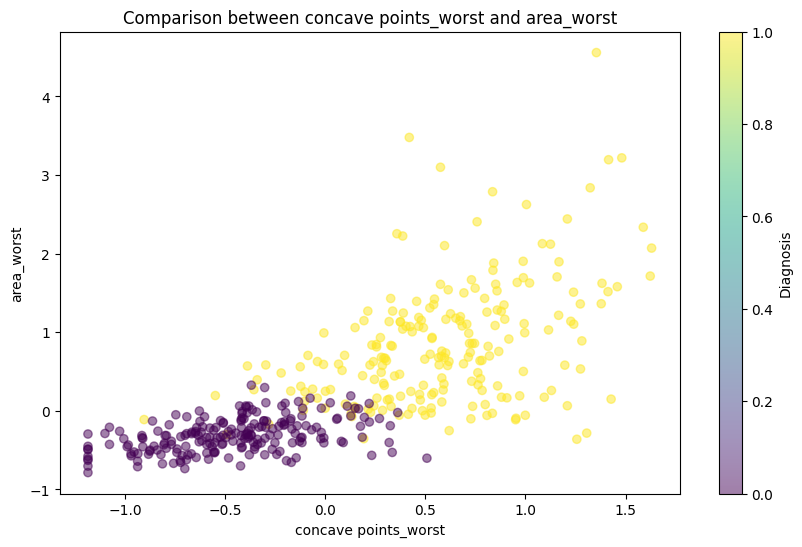

In [213]:
import matplotlib.pyplot as plt

# Scatter plot to compare concave points_worst and area_worst
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled['concave points_worst'], df_scaled['area_worst'], \
    alpha=0.5, c=df_scaled['Target'], cmap='viridis')
plt.title('Comparison between concave points_worst and area_worst')
plt.xlabel('concave points_worst')
plt.ylabel('area_worst')
plt.colorbar(label='Target')
plt.show()

So we indeed see a clear colinearity between the two remaining vars so we'll slightly change the recipe.

In [214]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop(columns=["Target"])\
    .drop(columns=["area_worst", "radius_worst"]), df_scaled.Target,\
    test_size=0.3, random_state=1)


vif_data = pd.DataFrame()
vif_data["feature"] = list(X_train)
vif_data["VIF"] = [variance_inflation_factor(X_train, i)
                          for i in range(len(X_train.columns))]

print('VIF (facteur d\'inflation de la variance)')
print(vif_data)

VIF (facteur d'inflation de la variance)
                feature        VIF
0  concave points_worst  10.467909
1       perimeter_worst   6.303954
2   concave points_mean   8.582749
3       concavity_worst   3.492496
4               area_se   2.906242


### Choosing Metrics

Le ``Recall`` mesure la capacité du modèle à identifier correctement les cas positifs (ici les patients atteint d'une tumeur maligne). Dans un contexte médical, il est essentiel de minimiser les faux négatifs, on va donc s'intéresser également à la ``spécificité`` et au ``NPV``(Negativite Predictive Value)


``Recall`` measures the model's ability to correctly identify positive cases (in this case, patients with a malignant tumor). In a medical context, it is crucial to minimize false negatives. We will also take ``NPV`` (Negative Predictive Value) (healthy patients being correctly classified as healthy) into consideration while keeping the ``specificity``( to avoid a high count of healthy patients being misclassified as sick) as high as possible to ensure we won't accidentally classify too many healthy individuals as sick either.

<img src="data/img/NPV.webp" style="height:100px" />

So We'll focus on recall while taking the other two into consideration

## Modelisation

### Running the perceptron

In [215]:
# Création et entraînement du perceptron
perceptron = Perceptron_v1(num_inputs=X_train.shape[1])
perceptron.train(X_train.values, y_train.values)

# Faire des prédictions sur les données de test
predictions = [perceptron.predict(x) for x in X_test.values]

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = cm.ravel()

# Calcul des métriques
perceptron_recall = TP / (TP + FN)
perceptron_npv = TN / (TN + FN)
perceptron_specificity = TN / (TN + FP)

print(f"Recall: {perceptron_recall:.2f}")
print(f"NPV: {perceptron_npv:.2f}")
print(f"Specificity: {perceptron_specificity:.2f}")

Recall: 0.97
NPV: 0.97
Specificity: 0.84


### Reexecuting the Random Forest Classifier with selected features

In [216]:
# Train a machine learning model using the new selected features
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate NPV and specificity
rf_NPV = TN / (TN + FN)
rf_specificity = TN / (TN + FP)

# Calculate recall
rf_recall = recall_score(y_test, y_pred)

print(f"Recall: {rf_recall}")
print(f"NPV: {rf_NPV}")
print(f"Specificity: {rf_specificity}")

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        64
           1       0.92      0.88      0.90        64

    accuracy                           0.90       128
   macro avg       0.90      0.90      0.90       128
weighted avg       0.90      0.90      0.90       128

Recall: 0.9180327868852459
NPV: 0.921875
Specificity: 0.8805970149253731


### Running a very basic Deep Learning model

In [217]:
df_scaled[features_in_common].dtypes

concave points_worst    float64
perimeter_worst         float64
radius_worst            float64
concave points_mean     float64
area_worst              float64
concavity_worst         float64
area_se                 float64
dtype: object

In [218]:
from keras.layers import Dropout

# Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss for improvement
    patience=50,            # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore model weights from the epoch with the best performance
)


# Define the model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall()])

# Train the model
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int64")
deep_recall = recall_score(y_test, y_pred)
print("Test Recall:", deep_recall)

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Specificity
deep_specificity = tn / (tn + fp)
print(f"Specificity: {deep_specificity}")

# NPV (Negative Predictive Value)
deep_npv = tn / (tn + fn)
print(f"NPV: {deep_npv}")

Epoch 1/2000
10/10 [==============================] - 2s 40ms/step - loss: 0.6314 - recall_1: 0.9139 - val_loss: 0.5750 - val_recall_1: 0.9836
Epoch 2/2000
10/10 [==============================] - 0s 9ms/step - loss: 0.5287 - recall_1: 0.9669 - val_loss: 0.4814 - val_recall_1: 0.9508
Epoch 3/2000
10/10 [==============================] - 0s 8ms/step - loss: 0.4615 - recall_1: 0.9735 - val_loss: 0.4122 - val_recall_1: 0.9344
Epoch 4/2000
10/10 [==============================] - 0s 8ms/step - loss: 0.3842 - recall_1: 0.9735 - val_loss: 0.3524 - val_recall_1: 0.9344
Epoch 5/2000
10/10 [==============================] - 0s 11ms/step - loss: 0.3141 - recall_1: 0.9669 - val_loss: 0.2940 - val_recall_1: 0.9344
Epoch 6/2000
10/10 [==============================] - 0s 8ms/step - loss: 0.2630 - recall_1: 0.9603 - val_loss: 0.2434 - val_recall_1: 0.9180
Epoch 7/2000
10/10 [==============================] - 0s 8ms/step - loss: 0.1877 - recall_1: 0.9338 - val_loss: 0.2199 - val_recall_1: 0.9180
Epoc

In [219]:
!pip freeze > requirements.txt

## Table comparing model results

In [220]:
# Create a dictionary with the metrics
metrics = {
    'Model': ["Perceptron", 'Random Forest', 'Deep Learning'],
    "Recall": [perceptron_recall, rf_recall, deep_recall],
    'NPV': [perceptron_npv, rf_NPV, deep_npv],
    'Specificity': [perceptron_specificity, rf_specificity, deep_specificity]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print(metrics_df)

           Model    Recall       NPV  Specificity
0     Perceptron  0.967213  0.965517     0.835821
1  Random Forest  0.918033  0.921875     0.880597
2  Deep Learning  0.918033  0.923077     0.895522


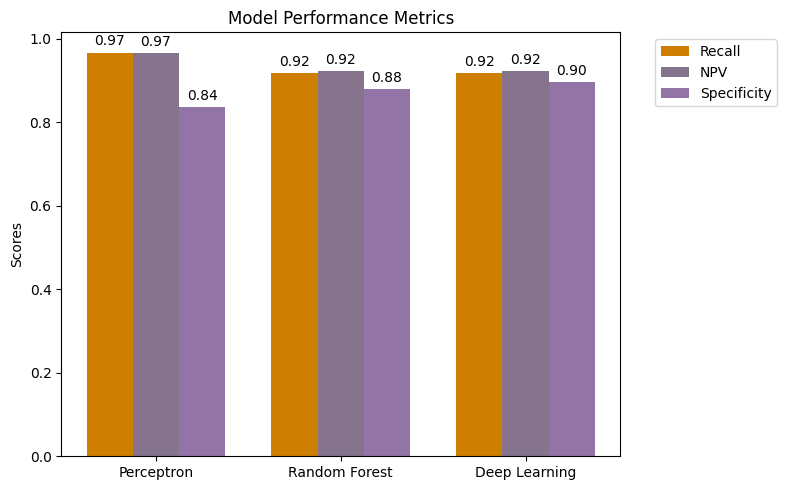

In [221]:
# Data for plotting
models = metrics_df["Model"]
recall = metrics_df["Recall"]
npv = metrics_df["NPV"]
specificity = metrics_df["Specificity"]

# Plot grouped bar chart
x = np.arange(len(models))  # Label locations
width = 0.25  # Width of bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width, recall, width, label="Recall", color="#CE7E00")
rects2 = ax.bar(x, npv, width, label="NPV", color="#85748C")
rects3 = ax.bar(x + width, specificity, width, label="Specificity", color="#9374A6")

# Add labels, title, and legend
ax.set_ylabel("Scores")
ax.set_title("Model Performance Metrics")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value annotations
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Save and show the plot
plt.tight_layout()
plt.savefig("image/result_comparison.png")
plt.show()

## Feature importance of our perceptron

Using 296 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 128/128 [00:18<00:00,  6.85it/s]


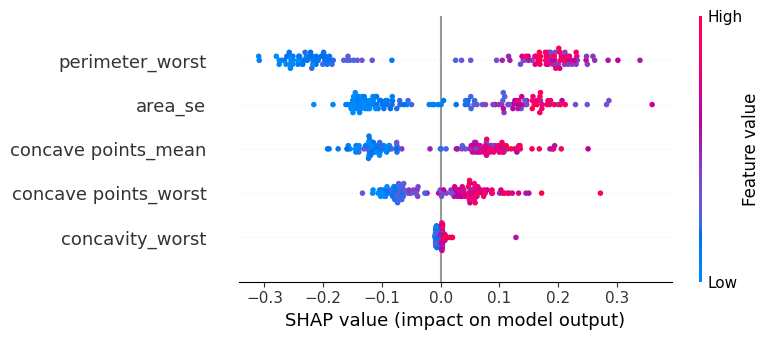

In [222]:
# Wrapper function for SHAP
def perceptron_predict(X):
    return np.array([perceptron.predict(x) for x in X])

# Use SHAP with the perceptron model
explainer = shap.KernelExplainer(perceptron_predict, X_train)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

## Conclusion

``Concluez sur l’efficacité d’un Perceptron sur ce type de problématique
puis, proposez des solutions sans les implémenter.``

Comme on pouvait s'y attendre, les performances d'un perceptron unique sont inferieur à celle d'un modèle basique de Machine Learning/Deep Learning, on remarque cependant que vu sa "simplicité" les résultats atteint dépassent tout de même la basiline et semble assez correcte.

petit passage comme quoi notre perceptron est nul et c'est en explorant d'autres stratégies comme le backtracking qu'on attendra de très bon résultat

Il n'en reste pas moins que la technologie employée est limitée, et en implémentant des méthodes de backtracking et rétropogatation nous attendons des résultats plus probant bien que n'atteignant pas la performance des modèles de ml & Deep Learning reconnus.